<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/NLP_RAG_Medical_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

**Revised Problem Statement:**

Healthcare professionals struggle to efficiently navigate the vast and complex medical literature, such as the Merck Manual, leading to information overload and delayed decision-making. This project develops a Retrieval-Augmented Generation (RAG)-based AI solution to streamline access to accurate, up-to-date medical knowledge. By leveraging advanced NLP techniques—including large language models, embeddings, and vector databases—the system will provide precise answers to critical medical queries, assess response quality, and deliver actionable insights. The goal is to enhance diagnostic accuracy, standardize care, and improve operational efficiency in healthcare settings.

**Steps to Create and Evaluate RAG:**
- **Install and Import Libraries:** Set up the Google Colab environment with necessary libraries for PDF processing, NLP, embeddings, vector databases, and LLMs.
- **Load PDF Data:** Extract text from the Merck Manual PDF using a robust PDF reader.
- **Exploratory Data Analysis (EDA):** Analyze the PDF structure, page count, and content distribution to understand the data.
- **Data Chunking:** Split the PDF text into manageable chunks for efficient retrieval.
- **Embedding Generation:** Use a SentenceTransformer model to create embeddings for the text chunks.
- **Vector Database Setup:** Store embeddings in a Chroma vector database with cosine similarity search.
- **Retriever Configuration:** Define a retriever to fetch relevant chunks based on query similarity.
- **Load LLM:** Download and configure the Mistral-7B-Instruct model for response generation.
- **Define Prompt Templates:** Create system and user prompts to guide the LLM in generating accurate responses.
- **Response Generation Function:** Build a function to combine retrieved context and LLM for question answering.
-**Question Answering with RAG:** Answer the five provided medical questions using the RAG pipeline.
- **Fine-Tune Parameters:** Experiment with at least five combinations of chunking, retriever, and LLM parameters (e.g., chunk size, k value, temperature, top_p).
- **Output Evaluation:** Use "**LLM-as-a-Judge**" to evaluate responses for groundedness and relevance with defined prompts.
- **Business Insights and Recommendations:** Summarize key takeaways and provide actionable recommendations for healthcare stakeholders.

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
!pip install huggingface_hub pandas tiktoken pymupdf langchain langchain-community chromadb sentence-transformers "numpy<2" -q
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" pip install --no-cache-dir llama-cpp-python==0.2.77 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu124

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.7 MB/s eta

**To compare "Responses" from LLM and RAG:**
- We'll use the following metrics for comparison:

1. Semantic Similarity (Cosine similarity using Sentence-BERT embeddings)
  * Measures how close the meaning is to a reference.

2. BLEU Score (N-gram overlap for fluency)
  *  Evaluate fluency and overlap with a gold-standard answer.

3. ROUGE Score (Recall-Oriented Understudy for Gisting Evaluation)
  *  Evaluate fluency and overlap with a gold-standard answer.

4. Readability (Flesch-Kincaid Grade Level)
  * Checks how easily understandable the response is.

In [2]:
# package for comparison matrics
!pip install sentence-transformers nltk rouge-score textstat tabulate

# Download NLTK data (first-time only)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab for sentence tokenization

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f6579ca94cc23ba81fc9ff57d2067f33dfa0440e4bdb71d4817ef4e391968fd4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Restart the Session before continuing**

In [1]:
#Libraries for processing dataframes,text
import json,os
import textstat # to compute readibility of the LLM responses
## For comparison of LLMs and RAG
from typing import Dict, List
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from tabulate import tabulate
# Download NLTK data (first-time only)
nltk.download('punkt')
##
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma # Chroma based on SQL Light

#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Insights:**
* PyMuPDF is chosen for fast and accurate PDF text extraction.
* SentenceTransformers provides state-of-the-art embeddings for text similarity.
* Chroma is a lightweight vector database suitable for in-memory storage.
* LangChain simplifies RAG pipeline integration.
* Bitsandbytes enables 4-bit quantization for efficient LLM inference on Colab’s GPU.

## Question Answering using LLM

## **Loading the Large Language Model**

#### Downloading and Loading the model

In [2]:
# # Model configuration
# model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
# model_basename = "llama-2-13b-chat.Q5_K_M.gguf"
# model_path = hf_hub_download(
#     repo_id=model_name_or_path,
#     filename=model_basename
#     )
# or use this
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [3]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Response

In [4]:
# function to generate, process, and return the response from the LLM
def generate_llama_response(user_prompt):

    # System message
    system_message = """
    [INST]<<SYS>> Respond to the user question based on the user prompt<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{user_prompt}\n{system_message}"

    # Generate a response from the LLaMA model
    response = llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text

    # def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
#     model_output = lcpp_llm(
#       prompt=query,
#       max_tokens=max_tokens,
#       temperature=temperature,
#       top_p=top_p,
#       top_k=top_k
#     )

#     return model_output['choices'][0]['text']

In [5]:
generate_llama_response("What treatment options are available for managing hypertension?") # testing with a random prompt


llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     163.83 ms /   278 runs   (    0.59 ms per token,  1696.92 tokens per second)
llama_print_timings: prompt eval time =     163.11 ms /    42 tokens (    3.88 ms per token,   257.49 tokens per second)
llama_print_timings:        eval time =    2653.81 ms /   277 runs   (    9.58 ms per token,   104.38 tokens per second)
llama_print_timings:       total time =    3124.32 ms /   319 tokens


"1. Lifestyle modifications: This includes regular physical activity, a healthy diet rich in fruits, vegetables, and low-fat dairy products, reducing sodium intake, limiting alcohol consumption, avoiding tobacco use, and managing stress through techniques such as meditation or deep breathing exercises.\n\n2. Medications: If lifestyle changes are not enough to control hypertension, medications may be prescribed by a healthcare professional. There are several classes of drugs used for treating hypertension including diuretics, beta blockers, ACE inhibitors, calcium channel blockers, and ARBs (angiotensin receptor blockers).\n\n3. Combination therapy: In some cases, more than one medication may be needed to effectively manage blood pressure levels. This is known as combination therapy.\n\n4. Non-pharmacological treatments: Certain alternative therapies have shown promise in managing hypertension, such as acupuncture, yoga, and mindfulness meditation. However, it's important to discuss the

### Question Answering using LLM (without Prompt Engineering)

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [6]:
user_input_1llm = "What is the protocol for managing sepsis in a critical care unit?"
raw_llm_response_1 = generate_llama_response(user_input_1llm)
raw_llm_response_1

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     403.30 ms /   688 runs   (    0.59 ms per token,  1705.92 tokens per second)
llama_print_timings: prompt eval time =      57.42 ms /    44 tokens (    1.30 ms per token,   766.28 tokens per second)
llama_print_timings:        eval time =    6552.84 ms /   687 runs   (    9.54 ms per token,   104.84 tokens per second)
llama_print_timings:       total time =    7549.77 ms /   731 tokens


"1. Recognize and suspect sepsis early: Look out for signs of infection, such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status, and lactic acidosis. Use the Sequential Organ Failure Assessment (SOFA) score to assess organ dysfunction.\n    2. Initiate resuscitation: Administer oxygen via high-flow nasal cannas or non-rebreather masks as needed for respiratory support. Start intravenous fluids, aiming for a target mean arterial pressure of 65 mmHg and a central venous pressure (CVP) between 8-12 cm H2O if the patient is mechanically ventilated.\n    3. Administer antibiotics: Begin broad-spectrum intravenous antibiotics as soon as possible based on suspected infection site, microbiology data, and local guidelines. Consider obtaining blood cultures before administering antibiotics when feasible.\n    4. Monitor hemodynamic status closely: Use invasive monitoring techniques like arterial lines, central venous catheters (CVCs), or pulmonary a

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [7]:
user_input_2llm = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
raw_llm_response_2 = generate_llama_response(user_input_2llm)
raw_llm_response_2

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     171.56 ms /   297 runs   (    0.58 ms per token,  1731.21 tokens per second)
llama_print_timings: prompt eval time =      57.95 ms /    62 tokens (    0.93 ms per token,  1069.98 tokens per second)
llama_print_timings:        eval time =    2811.31 ms /   296 runs   (    9.50 ms per token,   105.29 tokens per second)
llama_print_timings:       total time =    3189.87 ms /   358 tokens


"Appendicitis is a medical condition characterized by inflammation of the appendix. The following are common symptoms for appendicitis:\n\n1. Abdominal pain, usually starting around the navel and moving to the lower right side.\n2. Loss of appetite.\n3. Nausea and vomiting.\n4. Fever (often low-grade).\n5. Diarrhea or constipation.\n6. General discomfort, uneasiness, or malaise.\n7. Abdominal swelling and rigidity.\n8. Inability to pass gas or have a bowel movement.\n9. Pain upon walking, coughing, or taking deep breaths.\n\nAppendicitis cannot be cured via medicine alone as the inflammation can lead to rupture of the appendix if left untreated. A surgical procedure called an appendectomy is required for treatment. During this surgery, the surgeon removes the infected appendix to prevent further complications and potential spread of infection in the body. The most common type of appendectomy is a laparoscopic appendectomy, which uses small incisions and minimally invasive techniques. H

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [8]:
user_input_3llm = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
raw_llm_response_3 = generate_llama_response(user_input_3llm)
raw_llm_response_3

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     305.20 ms /   523 runs   (    0.58 ms per token,  1713.62 tokens per second)
llama_print_timings: prompt eval time =      58.40 ms /    64 tokens (    0.91 ms per token,  1095.98 tokens per second)
llama_print_timings:        eval time =    4975.49 ms /   522 runs   (    9.53 ms per token,   104.91 tokens per second)
llama_print_timings:       total time =    5681.17 ms /   586 tokens


"1. Possible Causes:\n   - Alopecia Areata: An autoimmune disorder that results in hair loss from certain areas of the scalp or body. It often presents as round patches of baldness.\n   - Trauma or Stress: Physical trauma, emotional stress, or excessive pulling on the hair can cause sudden patchy hair loss.\n   - Nutritional Deficiencies: Lack of essential nutrients like iron, zinc, and vitamin B12 may lead to hair thinning and patchiness.\n   - Medications: Certain medications such as chemotherapy drugs or those used for treating arthritis, depression, heart problems, gout, high blood pressure, or birth control pills can cause sudden hair loss.\n   - Hormonal Imbalance: Sudden hormonal changes due to pregnancy, menopause, thyroid disorders, or stress may lead to patchy hair loss.\n\n2. Effective Treatments and Solutions:\n   - Alopecia Areata: Topical treatments like minoxidil (Rogaine) can help stimulate new hair growth in some cases. Corticosteroids applied topically or injected int

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [9]:
user_input_4llm = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
raw_llm_response_4 = generate_llama_response(user_input_4llm)
raw_llm_response_4

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     361.59 ms /   610 runs   (    0.59 ms per token,  1686.99 tokens per second)
llama_print_timings: prompt eval time =      58.03 ms /    58 tokens (    1.00 ms per token,   999.55 tokens per second)
llama_print_timings:        eval time =    5811.01 ms /   609 runs   (    9.54 ms per token,   104.80 tokens per second)
llama_print_timings:       total time =    6673.22 ms /   667 tokens


"1. Medical Evaluation and Stabilization: The first priority is to ensure that the person's physical condition is stable, which may involve emergency surgery or other medical interventions if necessary. This could include controlling bleeding, managing swelling or pressure in the brain, addressing any respiratory issues, etc.\n\n2. Rehabilitation Program: Once the patient's condition has been stabilized, a rehabilitation program is typically recommended to help restore function and improve overall quality of life. Depending on the specific injury and its impact on brain function, this might include various therapies such as:\n   - Physical therapy: To address mobility issues or weakness in limbs.\n   - Occupational therapy: To help patients regain skills needed for daily living activities (e.g., dressing, cooking, writing).\n   - Speech-language therapy: For communication difficulties and swallowing problems.\n   - Cognitive rehabilitation: To address memory, attention, problem-solving

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [10]:
user_input_5llm = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
raw_llm_response_5 = generate_llama_response(user_input_5llm)
raw_llm_response_5

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     332.61 ms /   565 runs   (    0.59 ms per token,  1698.71 tokens per second)
llama_print_timings: prompt eval time =      78.72 ms /    65 tokens (    1.21 ms per token,   825.76 tokens per second)
llama_print_timings:        eval time =    5373.07 ms /   564 runs   (    9.53 ms per token,   104.97 tokens per second)
llama_print_timings:       total time =    6170.12 ms /   629 tokens


"1. Assessing the Injury: The first step is to assess the severity of the fracture. If you suspect a leg fracture while hiking, try not to move the person excessively and avoid putting weight on the injured leg. Check for signs of open wounds, swelling, deformities, numbness or tingling sensations, coldness, or discoloration in the affected limb.\n\n2. Call for Help: If you suspect a fracture, call emergency services immediately and provide them with your location. Inform them about the nature of the injury and any other relevant information such as the number of people injured, their ages, and any medical conditions they may have.\n\n3. Provide Basic First Aid: While waiting for help to arrive, try to keep the person calm and comfortable. Use a splint or improvised materials like sticks, clothing, or backpacks to immobilize the fractured leg as best you can without causing further harm. Keep the injured limb elevated above heart level if possible to reduce swelling and pain.\n\n4. Mon

In [11]:
# Raw LLM responses
raw_llm_responses = {
    "Question-1": """1. Recognize and suspect sepsis early: Look out for signs of infection, such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status, and lactic acidosis. Use the Sequential Organ Failure Assessment (SOFA) score to assess organ dysfunction.
    2. Initiate resuscitation: Administer oxygen via high-flow nasal cannas or non-rebreather masks as needed. Start intravenous fluids, aiming for a target mean arterial pressure of 65 mmHg and a central venous pressure (CVP) between 8-12 cm H2O if the patient is mechanically ventilated.
    3. Administer antibiotics: Choose empiric antimicrobials based on local guidelines, suspected infection source, and microbiological data when available. Consider broad-spectrum coverage for gram-positive and gram-negative organisms.
    4. Monitor hemodynamic status closely: Use invasive monitoring techniques like arterial lines, central venous catheters, or pulmonary artery catheters to assess cardiac output, oxygen delivery, and consumption. Adjust fluid resuscitation accordingly.
    5. Provide adequate tissue perfusion: Maintain an adequate mean arterial pressure (MAP) and CVP to ensure sufficient organ blood flow. Consider using vasopressors if necessary.
    6. Optimize oxygenation: Use mechanical ventilation as needed, aiming for a target SpO2 of 94-98% or PaO2 > 60 mmHg. Monitor arterial and venous blood gases regularly to assess adequacy of respiratory support.
    7. Correct metabolic acidosis: Administer sodium bicarbonate if pH is <7.15 or base deficit > 6 mEq/L, but be cautious as it may worsen intracellular acidosis and increase calcium ion binding.
    8. Provide adequate nutrition: Initiate enteral feeding within 24 hours of ICU admission if possible; consider parenteral nutrition for those unable to tolerate enteral feeds. Aim for a caloric intake of 1.5-2 times the basal energy expenditure (BEE).
    9. Support organ function: Provide appropriate care based on specific organ dysfunction, such as renal replacement therapy for kidney failure or vasopressor support for cardiovascular instability.
    10. Monitor and manage complications: Be aware of potential complications like coagulopathy, myocardial depression, and secondary infections; address these issues promptly to minimize morbidity and mortality.""",

    "Question-2": """
 Appendicitis is a medical condition characterized by inflammation of the appendix. The following are common symptoms for appendicitis:

1. Abdominal pain, usually starting around the navel and moving to the lower right side.
2. Loss of appetite.
3. Nausea and vomiting.
4. Fever (often low-grade).
5. Diarrhea or constipation.
6. General discomfort, uneasiness, or malaise.
7. Abdominal swelling and rigidity.
8. Inability to pass gas or have a bowel movement.
9. Pain upon walking, coughing, or taking deep breaths.

It's important to note that these symptoms can also be indicative of other conditions, so it is crucial to consult with a healthcare professional for an accurate diagnosis. Appendicitis cannot typically be cured via medicine alone; surgery (appendectomy) is usually required to remove the inflamed appendix and prevent complications such as rupture or peritonitis.

During an appendectomy, the surgeon makes an incision in the abdomen and removes the appendix. The procedure can be performed using open surgery (a larger incision) or laparoscopically (smaller incisions with the use of a camera). After recovery from the surgery, most people return to their normal activities within 1-2 weeks.""",

    "Question-3": """1. Possible Causes:
   - Alopecia Areata: An autoimmune disorder that results in hair loss from certain areas of the scalp or body. It often presents as round patches of baldness.
   - Trauma or Stress: Physical trauma, emotional stress, or excessive pulling on the hair can cause sudden patchy hair loss.
   - Nutritional Deficiencies: Lack of essential nutrients like iron, zinc, and vitamin B12 may lead to hair thinning and patchiness.
   - Hormonal Imbalance: Sudden hormonal changes due to pregnancy, menopause, or thyroid issues can cause temporary hair loss in patches.
   - Medications: Certain medications like chemotherapy drugs, antidepressants, and blood thinners may lead to sudden patchy hair loss as a side effect.
   2. Treatments:
  - Alopecia Areata: Topical treatments such as minoxidil or corticosteroids can help stimulate hair growth in alopecia areata cases. In severe cases, systemic steroid therapy may be recommended.
  - Trauma or Stress: Avoiding excessive pulling on the hair and managing stress through relaxation techniques like meditation, yoga, or deep breathing exercises can promote healthy hair regrowth.
  - Nutritional Deficiencies: Consuming a balanced diet rich in essential nutrients or taking supplements as recommended by a healthcare professional may help address patchy hair loss caused by deficiencies.
  - Hormonal Imbalance: Treating the underlying hormonal issue, such as thyroid disorders or menopause symptoms, can often lead to improved hair growth and reduced patchiness.
  - Medications: Discuss alternative medications with your healthcare provider if you suspect that a medication is causing sudden patchy hair loss. In some cases, switching to an alternate treatment may be necessary.

It's essential to consult a healthcare professional or dermatologist for proper diagnosis and personalized treatment recommendations when dealing with sudden patchy hair loss.""",

    "Question-4": """1. Medical Evaluation and Stabilization: The first step is to ensure that the person's physical condition is stable, which may involve hospitalization for surgery or other medical interventions if necessary. This could include controlling bleeding, managing swelling or pressure in the brain, addressing any respiratory issues, etc.

2. Rehabilitation Program: Once a patient's condition has stabilized, they will typically begin a rehabilitation program to help them regain as much function and independence as possible. This may include physical therapy for motor skills, occupational therapy for daily living tasks, speech-language therapy for communication issues, cognitive rehab for memory or problem solving abilities, and psychological support for emotional wellbeing.

3. Medications: Depending on the specific injury and symptoms, various medications might be prescribed to help manage conditions like seizures, pain, depression, anxiety, or other complications that can arise after a brain injury.

4. Assistive Devices and Technology: In some cases, individuals with brain injuries may require assistive devices such as wheelchairs, walkers, communication aids, or adaptive equipment for daily living tasks to improve their quality of life and functional abilities.

5. Lifestyle Modifications: Making lifestyle changes can also be beneficial in managing the effects of a brain injury. This might include getting enough rest, maintaining a healthy diet, engaging in regular physical activity, avoiding alcohol and drugs, practicing stress management techniques, etc.

6. Support Groups: Connecting with others who have experienced similar injuries or conditions through support groups can provide valuable emotional and social connections for individuals dealing with the challenges of brain injury recovery.

7. Education and Training: Learning about brain injury and its impact on daily life is essential to help individuals adapt and cope effectively. This may involve attending educational workshops, reading books, watching videos, or working one-on-one with healthcare professionals or therapists.

8. Vocational Rehabilitation: For those who are able to return to work after a brain injury, vocational rehab can help identify suitable employment opportunities and provide training for new skills if necessary. This can be an essential part of regaining independence and financial stability following an injury.""",

    "Question-5": """1. Assessing the Injury: The first step is to assess the severity of the fracture. If you suspect a leg fracture while hiking, try not to move the person excessively and avoid putting weight on the injured leg. Check for signs of open wounds, swelling, deformities, numbness or tingling sensations, and inability to bear weight.
    2. Call for Help: If possible, call emergency services or have someone from your group contact them. Provide accurate location information if you're hiking off-trail.
    3. Immobilize the Fracture: Use a splint, sling, or other available materials to immobilize the fractured leg as best as possible. This will help prevent further damage and discomfort during transport. Be careful not to apply too much pressure on the injury site while securing the makeshift brace.
    4. Provide Comfort: Keep the person warm by covering them with a blanket or insulating material, if necessary. Offer water or other fluids to help maintain hydration and provide reassurance during the wait for medical assistance.
    5. Monitor Vital Signs: Check their pulse rate, breathing rate, and blood pressure regularly while waiting for emergency services. Keep track of any changes in their condition.
    6. Prepare for Evacuation: If you're hiking off-trail or far from a road, consider how to safely evacuate the person with their injury. This may involve carrying them on a stretcher or using other rescue techniques depending on your group size and resources.
    7. Post-Injury Care: After reaching medical help, follow the doctor's instructions for post-fracture care, which could include wearing a cast or brace, taking pain medication, undergoing physical therapy, and avoiding weight-bearing activities until fully healed. Remember that recovery time varies depending on the severity of the fracture and individual healing rates.
    8. Prevention: To minimize the risk of leg injuries while hiking, wear appropriate footwear with good traction, stay on marked trails whenever possible, avoid carrying heavy loads, and be aware of your surroundings to prevent falls or tripping hazards."""
}

**Insights:**
- The response seems generic and appears to be derived from different sources, however, the authenticity of the generated responses is still ambiguous.

###**Using latest Merck Manual answers using Google Gemini as Gold-Standard Answers:**

In [12]:
# Gold-standard answers (from Merck Manual via Gemini)
gold_answers = {
    "What is the protocol for managing sepsis in a critical care unit?": """
    The protocol for managing sepsis in a critical care unit involves immediate and aggressive treatment. This includes:
    - Antibiotics: Broad-spectrum antibiotics within one hour.
    - Intravenous Fluids: Crystalloids for fluid resuscitation.
    - Oxygen Support: Ensure adequate oxygenation.
    - Source Control: Identify and remove infection sources.
    - Vasopressors: Norepinephrine if fluids fail.
    - Blood Glucose Control: Insulin if needed.
    - Corticosteroids: Hydrocortisone for persistent hypotension.
    - ICU Admission: For septic shock/severe sepsis.
    - Antimicrobial Reevaluation: Daily de-escalation checks.
    """,

    "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?": """
    Common symptoms of appendicitis:
    - Pain starting in upper abdomen/navel, shifting to right lower abdomen.
    - Nausea, vomiting, low-grade fever, loss of appetite.
    Appendicitis cannot be reliably cured with medicine alone. Surgical removal (appendectomy) is the recommended treatment.
    """,

    "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?": """
    Sudden patchy hair loss (alopecia areata) is an autoimmune condition. Treatments include:
    - Corticosteroids (injected/topical/oral).
    - Minoxidil, Anthralin, JAK inhibitors (baricitinib).
    - Methotrexate for severe cases.
    - PUVA therapy (limited success).
    """,

    "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?": """
    Treatments for Traumatic Brain Injury (TBI):
    - Mild: Observation, rest, pain relievers.
    - Moderate/Severe: ICU care, ICP monitoring, surgery for hematomas.
    - Rehabilitation: Physical, occupational, speech therapy.
    - Medications: Antiseizure drugs, stimulants, antidepressants.
    """,

    "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?": """
    Precautions for leg fracture:
    - Immobilize with splint, control bleeding, elevate, ice.
    - Avoid weight-bearing, seek emergency help.
    Treatment:
    - Pain relief, reduction (manual/surgical), casting.
    - Physical therapy, gradual return to activity.
    - Nutrition (calcium/vitamin D).
    """
}

**How to Interpret Results:**
* Semantic Similarity > 0.8: Strong alignment with gold answer.
* BLEU > 0.3: Good lexical overlap.
* ROUGE-L > 0.5: Decent summary-level similarity.
* Readability > 60: Easily understandable (60-70 = standard, 80+ = very easy).

###**Comparing LLM responses (without Prompt Engineering) with Gold-Standard**

In [13]:
# Initialize models
model = SentenceTransformer('all-MiniLM-L6-v2')
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def evaluate_response(gold: str, response: str) -> dict:
    # Semantic Similarity
    embeddings = model.encode([gold, response])
    semantic_sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

    # BLEU Score
    bleu = sentence_bleu([nltk.word_tokenize(gold)], nltk.word_tokenize(response))

    # ROUGE Score
    rouge = scorer.score(gold, response)

    # Readability
    readability = textstat.flesch_reading_ease(response)

    return {
        "Semantic Sim": round(semantic_sim, 3),
        "BLEU": round(bleu, 3),
        "Rouge-1": round(rouge['rouge1'].fmeasure, 3),
        "Rouge-L": round(rouge['rougeL'].fmeasure, 3),
        "Readability": round(readability, 1)
    }

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
# Evaluate Raw LLM
raw_results = {}
# Create a mapping from "Question-X" keys to the full question text
question_map = {
    "Question-1": "What is the protocol for managing sepsis in a critical care unit?",
    "Question-2": "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?", # Corrected the key
    "Question-3": "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",
    "Question-4": "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",
    "Question-5": "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
}

for q_key in raw_llm_responses:
    # Use the mapping to get the full question text
    full_question = question_map[q_key]
    raw_results[full_question] = evaluate_response(gold_answers[full_question], raw_llm_responses[q_key])

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [15]:
# Print Raw LLM Comparison
print("=== Raw LLM vs Gold Standard ===")
print(tabulate(
    [[q] + list(raw_results[q].values()) for q in raw_results],
    headers=["Question", "Semantic Sim", "BLEU", "Rouge-1", "Rouge-L", "Readability"],
    tablefmt="grid"
))

=== Raw LLM vs Gold Standard ===
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+--------+-----------+-----------+---------------+
| Question                                                                                                                                                                                    |   Semantic Sim |   BLEU |   Rouge-1 |   Rouge-L |   Readability |
+=============================================================================================================================================================================================+================+========+===========+===========+===============+
| What is the protocol for managing sepsis in a critical care unit?                                                                                                                           |  

## Question Answering using LLM (with Prompt Engineering)

In [16]:
system_prompt = "You are an expert medical assistant tasked with answering questions based on the content of a medical manual. Use the provided context to give accurate, concise, and relevant answers. If the context does not contain enough information to answer the question fully, clearly state that and provide a general response based on your knowledge. Format your answers clearly and professionally."

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [17]:
user_input_1llmpmt = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
prompt_engineered_response_1 = generate_llama_response(user_input_1llmpmt)
prompt_engineered_response_1

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     407.24 ms /   695 runs   (    0.59 ms per token,  1706.62 tokens per second)
llama_print_timings: prompt eval time =     103.08 ms /   116 tokens (    0.89 ms per token,  1125.34 tokens per second)
llama_print_timings:        eval time =    6675.77 ms /   694 runs   (    9.62 ms per token,   103.96 tokens per second)
llama_print_timings:       total time =    7748.29 ms /   810 tokens


' In a critical care unit, managing sepsis involves immediate recognition, quick initiation of appropriate therapy, and ongoing assessment and adjustment. Here are general steps for managing sepsis in a critical care setting:\n\n1. Recognition: Suspect sepsis based on clinical signs such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status, and lactic acidosis. Obtain blood cultures before starting antibiotics if possible.\n\n2. Initial Resuscitation: Administer high-flow oxygen via a nonrebreather mask to maintain adequate oxygenation. Start intravenous (IV) access with large bore catheters for fluid resuscitation. Give 30 mL/kg of crystalloid solution over the first hour, and repeat as needed based on hemodynamic response.\n\n3. Antibiotics: Administer broad-spectrum antibiotics based on suspected infection site and microbiology data if available. Consider empiric coverage for common pathogens such as methicillin-resistant Staphylococcus au

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [18]:
user_input_2llmpmt = system_prompt+"\n"+ "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
prompt_engineered_response_2 = generate_llama_response(user_input_2llmpmt)
prompt_engineered_response_2

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     138.94 ms /   239 runs   (    0.58 ms per token,  1720.19 tokens per second)
llama_print_timings: prompt eval time =      58.26 ms /    62 tokens (    0.94 ms per token,  1064.21 tokens per second)
llama_print_timings:        eval time =    2272.61 ms /   238 runs   (    9.55 ms per token,   104.73 tokens per second)
llama_print_timings:       total time =    2583.89 ms /   300 tokens


"Appendicitis is a medical condition characterized by inflammation of the appendix. Common symptoms include:\n\n1. Abdominal pain, usually starting around the navel and then shifting to the lower right side.\n2. Loss of appetite.\n3. Nausea and vomiting.\n4. Fever (often low-grade at first).\n5. Constipation or diarrhea.\n6. Abdominal swelling and rigidity.\n7. Inability to pass gas or have a bowel movement.\n8. Feeling sick, weak, or generally unwell.\n\nAppendicitis cannot be cured via medicine alone as the inflammation can lead to appendix rupture if left untreated. If diagnosed early, antibiotics may help manage symptoms and prevent complications before surgery. However, a surgical procedure called an appendectomy is typically required for treatment. This involves removing the infected appendix through either open or laparoscopic surgery. It's essential to consult with a healthcare professional if you suspect appendicitis as early diagnosis and intervention can significantly improv

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [19]:
user_input_3llmpmt = system_prompt+"\n"+ "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
prompt_engineered_response_3 = generate_llama_response(user_input_3llmpmt)
prompt_engineered_response_3

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     249.21 ms /   422 runs   (    0.59 ms per token,  1693.36 tokens per second)
llama_print_timings: prompt eval time =      58.24 ms /    64 tokens (    0.91 ms per token,  1098.86 tokens per second)
llama_print_timings:        eval time =    4024.56 ms /   421 runs   (    9.56 ms per token,   104.61 tokens per second)
llama_print_timings:       total time =    4585.60 ms /   485 tokens


'There are several potential treatments for sudden, patchy hair loss, also known as alopecia areata. This condition is characterized by round patches of baldness that develop when the immune system attacks hair follicles. Here are some effective solutions:\n\n1. Topical corticosteroids: These medications can be applied directly to the affected area to reduce inflammation and promote regrowth. They may be prescribed in the form of creams, gels, or foams.\n2. Injections: Corticosteroid injections into the bald spots can also help stimulate hair growth by reducing inflammation and suppressing the immune response.\n3. Minoxidil: This medication is applied topically to the scalp and has been shown to promote hair regrowth in some people with alopecia areata. It works by increasing blood flow to the follicles and extending their growth phase.\n4. DHT blockers: Finasteride and dutasteride are medications that can help slow down or stop hair loss by blocking dihydrotestosterone (DHT), a hormon

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [20]:
user_input_4llmpmt = system_prompt+"\n"+ "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
prompt_engineered_response_4 = generate_llama_response(user_input_4llmpmt)
prompt_engineered_response_4

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     192.64 ms /   328 runs   (    0.59 ms per token,  1702.63 tokens per second)
llama_print_timings: prompt eval time =      57.91 ms /    58 tokens (    1.00 ms per token,  1001.64 tokens per second)
llama_print_timings:        eval time =    3121.72 ms /   327 runs   (    9.55 ms per token,   104.75 tokens per second)
llama_print_timings:       total time =    3546.82 ms /   385 tokens


"For someone with a brain injury causing temporary or permanent impairment of brain function, treatment may include:\n\n1. Emergency care: This could involve addressing any life-threatening conditions such as airway obstruction, breathing difficulties, or excessive bleeding.\n2. Medications: Depending on the specific symptoms and complications, medications might be prescribed to manage seizures, control pain, reduce swelling in the brain, prevent or treat infections, or improve cognitive function.\n3. Rehabilitation therapy: This may include physical therapy, occupational therapy, speech-language therapy, and/or cognitive rehabilitation to help individuals regain lost skills and adapt to any residual impairments.\n4. Surgery: In some cases, surgery might be necessary to remove blood clots or repair skull fractures that could worsen the injury or hinder recovery.\n5. Assistive devices: Devices such as wheelchairs, walkers, braces, and communication aids can help individuals with brain i

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [21]:
user_input_5llmpmt = system_prompt+"\n"+ "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
prompt_engineered_response_5 = generate_llama_response(user_input_5llmpmt)
prompt_engineered_response_5

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     196.98 ms /   341 runs   (    0.58 ms per token,  1731.11 tokens per second)
llama_print_timings: prompt eval time =      78.87 ms /    65 tokens (    1.21 ms per token,   824.15 tokens per second)
llama_print_timings:        eval time =    3249.37 ms /   340 runs   (    9.56 ms per token,   104.64 tokens per second)
llama_print_timings:       total time =    3710.48 ms /   405 tokens


"1. Necessary Precautions:\n   - Ensure that the person does not bear weight on the affected leg to prevent further damage or displacement of the fracture.\n   - Apply a splint, sling, or brace to immobilize the leg and maintain alignment of the bones.\n   - Keep the injured area elevated above heart level to reduce swelling and pain.\n   - Protect the injury from direct sunlight and extreme temperatures.\n   - Administer over-the-counter pain medication as needed for comfort, but avoid giving aspirin due to its blood thinning properties which may increase bleeding risk.\n\n2. Treatment Steps:\n   - Seek medical attention promptly if you suspect a fracture or cannot move the leg without causing severe pain.\n   - The healthcare professional will assess the injury and determine the type of fracture, which could include an X-ray examination.\n   - Depending on the severity of the fracture, treatment options may range from immobilization with a cast to surgery for complex or displaced fra

**Insights:**
- The responses are derived from different sources, the responses are better than raw llm but still needs authentication.

###**Comparing LLM responses (with Prompt Engineering) with Gold-Standard**

In [22]:
prompt_engineered_responses = {
    "Question-1": """ In a critical care unit, managing sepsis involves immediate recognition, quick initiation of appropriate therapy, and ongoing assessment and adjustment. Here are general steps for managing sepsis in a critical care setting:

1. Recognition: Suspect sepsis based on clinical signs such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status, and lactic acidosis. Obtain blood cultures before starting antibiotics if possible.

2. Initial resuscitation: Administer high-flow oxygen via a nonrebreather mask to maintain adequate oxygenation. Start intravenous (IV) access with large bore catheters for fluid administration. Give 30 mL/kg of crystalloid solution over the first hour, and continue infusion at a rate sufficient to maintain mean arterial pressure (MAP) >65 mmHg or a MAP increase of ≥20% from baseline.

3. Antibiotics: Administer broad-spectrum antibiotics based on suspected infection site and microbial susceptibilities. Consider empiric coverage for common pathogens such as methicillin-resistant Staphylococcus aureus (MRSA), Pseudomonas aeruginosa, and Enterococcus species.

4. Source control: Identify and address the source of infection whenever possible. This may include surgical intervention for abscesses or drainage procedures for infected wounds.

5. Fluid management: Monitor fluid balance closely to avoid over-resuscitation while maintaining adequate tissue perfusion. Consider using colloids, blood products, or vasopressors if needed to maintain MAP and organ function.

6. Inotropic support: Administer inotropes such as dopamine, dobutamine, or milrinone to improve cardiac output when necessary.

7. Electrolyte replacement: Monitor electrolytes closely and replace as needed due to diuretic therapy, insensible losses, or ongoing metabolic demands.

8. Glucose control: Maintain strict glucose control (<150 mg/dL) using continuous insulin infusions if necessary.

9. Renal replacement therapy: Consider initiating renal replacement therapy in cases of severe sepsis or septic shock with persistent organ dysfunction despite adequate fluid resuscitation and vasopressor support.

10. Monitoring: Continuously monitor vital signs, laboratory values (including lactate levels), urine output, and clinical response to treatment. Adjust therapy as needed based on ongoing assessment.""",

    "Question-2": """Appendicitis is a medical condition characterized by inflammation of the appendix. Common symptoms include:

1. Abdominal pain, usually starting around the navel and then shifting to the lower right side.
2. Loss of appetite.
3. Nausea and vomiting.
4. Fever (often low-grade at first).
5. Constipation or diarrhea.
6. Abdominal swelling and rigidity.
7. Inability to pass gas or have a bowel movement.
8. Feeling sick, weak, or generally unwell.

Appendicitis cannot be cured via medicine alone as the inflammation can lead to rupture of the appendix if left untreated. If the appendix bursts, it may cause peritonitis – a serious infection in the abdominal cavity that requires immediate medical attention. The standard treatment for appendicitis is surgical removal of the affected organ called an appendectomy. This procedure can be performed as open surgery or laparoscopically (keyhole surgery). Both methods aim to remove the inflamed appendix while minimizing damage to surrounding tissues and ensuring a quick recovery.""",

    "Question-3": """There are several potential treatments for sudden, patchy hair loss, also known as alopecia areata. This condition is characterized by round or oval bald spots that develop suddenly on various areas of the scalp. The exact cause of alopecia areata is not fully understood, but it's believed to be an autoimmune disorder where the body attacks its own hair follicles.

    1. Topical treatments: Minoxidil (Rogaine) is a medication that can help stimulate hair growth in some people with alopecia areata. It comes as a liquid or foam and is applied directly to the scalp twice daily.

    2. Injections: Corticosteroid injections, such as triamcinolone acetonide (Kenalog), can be effective for treating small bald spots. The medication is injected into the affected area every 4-6 weeks until hair regrowth occurs.

    3. Systemic treatments: Oral corticosteroids like prednisone may be prescribed to treat extensive alopecia areata or when other treatments have not been effective. However, long-term use of oral steroids can lead to side effects and should only be considered under the supervision of a healthcare professional.

    4. Immunotherapy: Diphenylcyclopropenone (DPCP) is an immunotherapeutic agent that can help promote hair regrowth in some people with alopecia areata. It's applied to the scalp once or twice weekly and may cause skin irritation as a side effect.

    5. Alternative therapies: Some alternative treatments, such as acupuncture, herbal remedies (like saw palmetto), and essential oils (such as rosemary oil) have shown promise in promoting hair growth for some individuals with alopecia areata. However, more research is needed to confirm their effectiveness and safety.

    Possible causes of sudden patchy hair loss include:
    - Autoimmune disorders like alopecia areata or lupus erythematosus
    - Hormonal imbalances (such as thyroid issues)
    - Nutritional deficiencies, particularly in iron and protein
    - Stress or emotional trauma
    - Certain medications (like chemotherapy drugs, antidepressants, and beta-blockers)
    - Infections like ringworm of the scalp.

    It's essential to consult a healthcare professional for an accurate diagnosis and appropriate treatment plan if you experience sudden patchy hair loss.""",

    "Question-4": """Based on the context provided, there is no specific information about treatments for a person with a physical injury to brain tissue. However, I can provide some general information based on common medical practices and research findings.

For temporary impairment of brain function due to a traumatic brain injury (TBI), treatment may include:
1. Rest and relaxation: The injured person should get plenty of rest and avoid physical or mental exertion that could worsen their condition.
2. Medications: Depending on the symptoms, medications such as pain relievers, anti-inflammatory drugs, sedatives, or stimulants may be prescribed to manage various symptoms like headache, anxiety, depression, or sleep disturbances.
3. Rehabilitation therapy: Physical, occupational, and speech therapies can help improve motor skills, cognitive function, communication abilities, and overall quality of life.
4. Surgery: In some cases, surgery may be necessary to remove hematomas (blood clots) or repair skull fractures that could worsen the condition or increase the risk of complications.
5. Dietary modifications: A balanced diet rich in nutrients and antioxidants can help support brain health during recovery.
6. Support groups: Joining a support group for TBI survivors and their families can provide emotional and social benefits, as well as valuable information about coping strategies and resources.

For permanent impairment of brain function due to a traumatic injury or other conditions like stroke or degenerative diseases, treatment may focus on managing symptoms and maximizing functional abilities through:
1. Rehabilitation therapy: As mentioned above, rehabilitation therapies can help improve motor skills, cognitive function, communication abilities, and overall quality of life for individuals with permanent brain impairment as well.
2. Assistive devices: Devices like wheelchairs, walkers, or communication aids can make daily activities easier and safer for those with physical limitations due to brain injury.
3. Medications: Depending on the symptoms, medications may be prescribed to manage various conditions such as seizures, pain, depression, anxiety, or sleep disturbances.
4. Lifestyle modifications: Making lifestyle changes like getting regular exercise, practicing stress management techniques, and maintaining a healthy diet can help improve overall health and well-being for individuals with permanent brain impairment.
5. Support services: Accessing support services such as home care, transportation assistance, or financial aid can help make daily life easier and more manageable for those with permanent brain injuries.""",

    "Question-5": """1. Necessary Precautions:
   - Ensure that the person does not bear weight on the affected leg to prevent further damage or displacement of the fracture.
   - Apply a splint, sling, or brace to immobilize the leg and maintain alignment of the bones.
   - Keep the injured area elevated above heart level to reduce swelling and pain.
   - Protect the injury from direct sunlight and extreme temperatures.
   - Administer over-the-counter pain medication as needed for comfort, but avoid giving aspirin due to its blood thinning properties which may increase bleeding risk.

2. Treatment Steps:
   - Seek medical attention promptly if you suspect a fracture or cannot move the leg without significant pain.
   - The healthcare professional will assess the injury and determine the type of fracture, which could involve setting the bone with pins, plates, or screws in some cases.
   - Depending on the severity of the fracture, immobilization may be required using a cast, brace, or splint for several weeks to months.
   - Physical therapy and rehabilitation exercises will likely be recommended after healing to restore strength, flexibility, and mobility to the affected leg.

3. Considerations for Care and Recovery:
   - Provide emotional support and encouragement during recovery as it can be a lengthy process.
   - Ensure proper nutrition and hydration to promote optimal bone healing.
   - Encourage regular follow-up appointments with the healthcare professional to monitor progress and address any concerns or complications that may arise.
   - Make necessary modifications at home, such as installing grab bars in the bathroom or using a shower chair, to make daily activities easier during recovery."""
}

In [23]:
# Evaluate Prompt-Engineered LLM
prompt_results = {}
for q_key in prompt_engineered_responses:
  # Use the mapping to get the full question text
    full_question = question_map[q_key]
    prompt_results[full_question] = evaluate_response(gold_answers[full_question], prompt_engineered_responses[q_key])

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [24]:
# Print Prompt-Engineered LLM Comparison
print("\n=== Prompt-Engineered LLM vs Gold Standard ===")
print(tabulate(
    [[q] + list(prompt_results[q].values()) for q in prompt_results],
    headers=["Question", "Semantic Sim", "BLEU", "Rouge-1", "Rouge-L", "Readability"],
    tablefmt="grid"
))


=== Prompt-Engineered LLM vs Gold Standard ===
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+--------+-----------+-----------+---------------+
| Question                                                                                                                                                                                    |   Semantic Sim |   BLEU |   Rouge-1 |   Rouge-L |   Readability |
+=============================================================================================================================================================================================+================+========+===========+===========+===============+
| What is the protocol for managing sepsis in a critical care unit?                                                                                                               

**Insights:**
- The comparison showed better metric readings compared to the raw LLM responses.

###**Comparing Raw LLM vs LLM with Prompt Engineering**

In [25]:
# Comparative Analysis
print("\n=== Method Comparison (Average Scores) ===")
avg_raw = {
    k: np.mean([raw_results[q][k] for q in raw_results])
    for k in raw_results[full_question].keys()
}
avg_prompt = {
    k: np.mean([prompt_results[q][k] for q in prompt_results])
    for k in prompt_results[full_question].keys()
}

print(tabulate(
    [
        ["Raw LLM"] + list(avg_raw.values()),
        ["Prompt-Engineered"] + list(avg_prompt.values())
    ],
    headers=["Method", "Semantic Sim", "BLEU", "Rouge-1", "Rouge-L", "Readability"],
    tablefmt="grid"
))


=== Method Comparison (Average Scores) ===
+-------------------+----------------+--------+-----------+-----------+---------------+
| Method            |   Semantic Sim |   BLEU |   Rouge-1 |   Rouge-L |   Readability |
+===================+================+========+===========+===========+===============+
| Raw LLM           |         0.7242 | 0.0068 |    0.1464 |    0.0946 |         22.26 |
+-------------------+----------------+--------+-----------+-----------+---------------+
| Prompt-Engineered |         0.8332 | 0.0218 |    0.191  |    0.1204 |         23.52 |
+-------------------+----------------+--------+-----------+-----------+---------------+


###**Comparison Result**

In [26]:
# Determine which method performed better overall
better_method = {}
for metric in avg_raw:
    if avg_prompt[metric] > avg_raw[metric]:
        better_method[metric] = "Prompt-Engineered"
    else:
        better_method[metric] = "Raw LLM"

print("\n=== Better Performing Method by Metric ===")
print(tabulate(
    [[k, v] for k, v in better_method.items()],
    headers=["Metric", "Better Method"],
    tablefmt="grid"
))


=== Better Performing Method by Metric ===
+--------------+-------------------+
| Metric       | Better Method     |
+==============+===================+
| Semantic Sim | Prompt-Engineered |
+--------------+-------------------+
| BLEU         | Prompt-Engineered |
+--------------+-------------------+
| Rouge-1      | Prompt-Engineered |
+--------------+-------------------+
| Rouge-L      | Prompt-Engineered |
+--------------+-------------------+
| Readability  | Prompt-Engineered |
+--------------+-------------------+


**Insights:**
* Clearly the comparison showed the better method is LLM with prompt Engineering to get the responses.

##**Incorporating RAG on Merck Medical Manual**

## Data Preparation for RAG

### Loading the Data

In [27]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# loading data into a pandas dataframe
manual_pdf_path = '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/NLP_GenAI/Project_05_AI_Medical_Assistant/medical_diagnosis_manual.pdf'
pdf_loader = PyMuPDFLoader(manual_pdf_path)
manual = pdf_loader.load()

**Insights:**

* PyMuPDF extracts text reliably, preserving structure better than alternatives like pdfplumber.
* The extracted text may include headers, footers, or formatting artifacts, which will be addressed in chunking.

### Data Overview

#### Checking the first 5 pages

In [29]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
adnan.nasir.syed@gmail.com
U32NV1EXYH
nt for personal use by adnan.nasir.syed@
shing the contents in part or full is liable
Page Number : 2
adnan.nasir.syed@gmail.com
U32NV1EXYH
This file is meant for personal use by adnan.nasir.syed@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.
Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ............................................................................................................................................................................

#### Checking the number of pages and Average words per page

In [30]:
num_pages = len(manual)
print(f"Number of pages in the PDF: {num_pages}")

Number of pages in the PDF: 4114


In [31]:
# Word count analysis
total_words = 0
for doc in manual:
    total_words += len(doc.page_content.split())

avg_words_per_page = total_words / num_pages
print(f"\nAverage words per page: {avg_words_per_page:.2f}")


Average words per page: 484.40


**Insights:**

* The EDA confirms the PDF has 4,114 pages, aligning with the data dictionary.
First and last pages may contain metadata (e.g., title, index), which should be excluded during chunking.
* Average words per page (484) suggests chunk sizes of greater or equal to **350** words for balanced retrieval.

**Why This Range:**
1. Semantic Coherence:
Chunks smaller than 350 words may lose context (e.g., breaking mid-paragraph).
Chunks larger than 550 words risk information dilution (irrelevant text in retrieval).
2. Retrieval Accuracy:
Smaller chunks (300-450 words) work better for precise question-answering.
Larger chunks (450-600 words) suit summarization or broad queries.
3. Empirical Evidence:
Most RAG implementations use 256 to 512 tokens (aprox 200 to 400 words per page average).
LLaMA/BERT tokenizers average 1.3 tokens per word, so 300 words aprox to 390 tokens.

### Data Chunking

In [32]:
# Split the PDF into chunks
text_splitter = RecursiveCharacterTextSplitter(
    #encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=20)
chunks = text_splitter.split_documents(manual)


In [33]:
len(chunks)

31192

In [34]:
chunks[0].page_content

'adnan.nasir.syed@gmail.com\nU32NV1EXYH\nnt for personal use by adnan.nasir.syed@\nshing the contents in part or full is liable'

In [35]:
chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2'

In [36]:
chunks[3].page_content

'2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53'

In [37]:
chunks[-1000].page_content

"G\nGABA 1608, 1610\nGabapentin\nin dying patient 3484\nin multiple sclerosis 1783\nin pain 1628, 1631, 1633\nin pruritus 640\nin sciatica 383\nin seizures 1696\nin trigeminal neuralgia 1754\nGadolinium 3407\nGag reflex 1589\nGait\nage-related changes in 3128\nassessment of 3131\nin cerebral palsy syndromes 2897\ndisorders of 3128-3134, 3130, 3132-3133\nevaluation of 285, 1590, 1602\nin elderly patient 3085, 3085\nin Parkinson's disease 1766\nrheumatic 1766\nGalactocele 2554"

In [38]:
chunks[-999].page_content

"Galactocele 2554\nGalactocerebroside β-galactosidase deficiency 3021-3022\nGalactokinase deficiency 3016\nGalactomannans 1324\nGalactorrhea 769, 770-772, 2504\nGalactosemia 3016-3017\nGalactose-1-phosphate uridyl transferase deficiency 3016\nα-Galactosidase A deficiency 3022\nGalactosylceramide lipidosis 3021-3022\nGalantamine 1677, 1679, 1680\nGaleazzi sign 2972, 2973, 2996\nGallavardin's phenomenon 2182\nGallbladder\ncalculi of (see Gallstones)\ncarcinoma of 280\nfistula of 274\ninflammation of 273-275\nimaging in 229"

In [39]:
chunks[-1001].page_content

'in children 2857\nFusion proteins 1088, 1089\nFusobacterium infection 1299-1300\nFusospirochetosis 520\nThe Merck Manual of Diagnosis & Therapy, 19th Edition\nF\n3851\nadnan.nasir.syed@gmail.com\nU32NV1EXYH\nThis file is meant for personal use by adnan.nasir.syed@gmail.com only.\nSharing or publishing the contents in part or full is liable for legal action.'

In [40]:
chunks[-2].page_content

"toxicity of 49, 55\ncopper deficiency and 49\nin Wilson's disease 52\nZinc oxide 2233\ngelatin formulation of 646, 672\nZinc pyrithione 647\nZinc shakes 55\nZipper injury 3239, 3240\nZiprasidone\nin agitation 1492\nin bipolar disorder 3059\npoisoning with 3347\nin schizophrenia 1566\nZoledronate 359, 361, 848\nZollinger-Ellison syndrome 95, 199, 200-201, 910\nmastocytosis vs 1125\nMenetrier's disease vs 132\npeptic ulcer disease vs 134\nZolmitriptan 1721\nZolpidem 1709, 3103\nZonisamide 1701\nZoonotic diseases, cutaneous 718"

In [41]:
chunks[-1].page_content

'Zoophobia 1498\nZoster (see Herpes zoster virus infection)\nZygomycosis 1332\nThe Merck Manual of Diagnosis & Therapy, 19th Edition\nZ\n4104\nadnan.nasir.syed@gmail.com\nU32NV1EXYH\nThis file is meant for personal use by adnan.nasir.syed@gmail.com only.\nSharing or publishing the contents in part or full is liable for legal action.'

**Insights:**
* RecursiveCharacterTextSplitter ensures chunks respect sentence boundaries, improving semantic coherence.
* A chunk size of 512 with 50 overlap balances context retention and retrieval efficiency.
* Total Chunks = Total Pages×(1+ [(Words/Page−Chunk Size)/(Chunk Size - Overlap)]
* The number of chunks (31192 chunks for 4114 pages) is manageable for Chroma in Colab.

* As expected, there are some overlaps
  - If we increase the `chunk_overlap`, the overlapping length of the sentence will also increase.

**Key Notes:**
* Edge Cases:
  - Pages with ≤512 words → 1 chunk.
  - Pages with 512 to 1000 words → 2 chunks.
  - Average (484 words) consistently produces 1 chunk/page.
* Why This Works:
  - The overlap ensures context continuity between chunks.
  - Example for a 484-word page:
  - Chunk 1: Words 1 to 484.
- Chunk 2: Words 484 to 512.
* Total Words Processed:
- 4114 pages * 484 words/page = 1991176 words

### Embedding

In [42]:
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large') #

/tmp/ipython-input-42-1239058868.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large') #


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [43]:
embedding_1 = embedding_model.embed_query(chunks[0].page_content)
embedding_2 = embedding_model.embed_query(chunks[1].page_content)

In [44]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  1024


True

In [45]:
embedding_1,embedding_2

([-0.029511863365769386,
  -0.018277158960700035,
  -0.009902599267661572,
  0.006382147315889597,
  -0.002250062534585595,
  -0.025702940300107002,
  -0.030007794499397278,
  0.013407188467681408,
  0.009031722322106361,
  0.02029811590909958,
  0.04046305641531944,
  -0.01645786687731743,
  0.013739487156271935,
  -0.036074962466955185,
  -0.02506267838180065,
  0.0034376506227999926,
  -0.010705819353461266,
  -0.017908256500959396,
  0.02062917686998844,
  -0.02082456275820732,
  0.024849172681570053,
  -0.0007572080940008163,
  -0.07040292769670486,
  -0.025629326701164246,
  -0.00028684179414995015,
  0.002102814381942153,
  0.025332821533083916,
  -0.0035484894178807735,
  0.051956988871097565,
  0.04494885355234146,
  -0.0013855212600901723,
  -0.00011513510980876163,
  0.0322541780769825,
  -0.04766470938920975,
  -0.021785259246826172,
  0.014687501825392246,
  0.044635627418756485,
  -0.024695957079529762,
  -0.037170782685279846,
  -0.03886772319674492,
  -0.000142421617056

**Insights:**
* **https://huggingface.co/thenlper/gte-large**
* The GTE models are trained by Alibaba DAMO Academy. They are mainly based on the BERT framework and currently offer three different sizes of models, including GTE-large, GTE-base, and GTE-small. The GTE models are trained on a large-scale corpus of relevance text pairs, covering a wide range of domains and scenarios. This enables the GTE models to be applied to various downstream tasks of text embeddings, including information retrieval, semantic textual similarity, text reranking, etc.
* The embedding dimension is fixed at 1024, suitable for Chroma's cosine similarity search.
* Embeddings capture semantic meaning, enabling accurate retrieval of relevant chunks.
* The embedding model provides a fixed-length (1024) vector for any number of chunks.  
* This is necessary because we want to compare them for similarity.

### Vector Database

In [46]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [47]:
vectorstore = Chroma.from_documents(
    chunks,
    embedding_model,
    persist_directory = out_dir
)

In [48]:
# Only reload if the object isn't in memory or after a runtime restart
if 'vectorstore' not in locals():
    vectorstore = Chroma(
        persist_directory=out_dir,
        embedding_function=embedding_model
    )

In [49]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [50]:
vectorstore.similarity_search("Atrial Fibrillation, Pharynx, Telangiectases",k=3) # Checking if similar content is fetched,

[Document(metadata={'creationdate': '2012-06-15T05:44:40+00:00', 'total_pages': 4114, 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition', 'creator': 'Atop CHM to PDF Converter', 'author': '', 'modDate': 'D:20250529143932Z', 'source': '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/NLP_GenAI/Project_05_AI_Medical_Assistant/medical_diagnosis_manual.pdf', 'subject': '', 'creationDate': 'D:20120615054440Z', 'format': 'PDF 1.7', 'file_path': '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/NLP_GenAI/Project_05_AI_Medical_Assistant/medical_diagnosis_manual.pdf', 'page': 1371, 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'keywords': '', 'trapped': '', 'moddate': '2025-05-29T14:39:32+00:00'}, page_content='Pharyngitis: Ordinarily, pharyngeal GABHS infections, including scarlet fever, are self-limited. Antibiotics\nshorten the course in young children, especially those with scarlet fever, but have only modest effect on\nsymptoms in adolescents and adu

**Insights:**
* From the retrieved chunks, we observe that all the chunks are related to the key terms [ 'Atrial Fibrillation', 'Pharynx', 'Telangiectases'].
* Chroma is ideal for in-memory vector storage in Colab, supporting cosine similarity for accurate retrieval.
* Cosine similarity ensures robust matching of query embeddings to chunk embeddings.

### Retriever

In [51]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k':2}
)

In [52]:
rel_docs = retriever.get_relevant_documents("how can polyps be prevented") # Check if related chunks were fetched from the document k=2 will fetch two relevant chunks
rel_docs

/tmp/ipython-input-52-917390870.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rel_docs = retriever.get_relevant_documents("how can polyps be prevented") # Check if related chunks were fetched from the document k=2 will fetch two relevant chunks


[Document(metadata={'page': 270, 'creator': 'Atop CHM to PDF Converter', 'creationdate': '2012-06-15T05:44:40+00:00', 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition', 'moddate': '2025-05-29T14:39:32+00:00', 'format': 'PDF 1.7', 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'subject': '', 'file_path': '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/NLP_GenAI/Project_05_AI_Medical_Assistant/medical_diagnosis_manual.pdf', 'modDate': 'D:20250529143932Z', 'keywords': '', 'source': '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/NLP_GenAI/Project_05_AI_Medical_Assistant/medical_diagnosis_manual.pdf', 'creationDate': 'D:20120615054440Z', 'total_pages': 4114, 'author': '', 'trapped': ''}, page_content='newly discovered lesions. If 2 annual examinations are negative for new lesions, colonoscopy is\nrecommended every 2 to 3 yr.\nPrevention\nAspirin and COX-2 inhibitors may help prevent formation of new polyps in patients with polyps or colon\ncancer

**Insights:**
- We can observe that the two relevant chunks contain the answer to the query.  
- If we increase the **`k`** value, there is a chance that we might find the answer in even more chunks.  
- This is a hyperparameter that we need to tune to get the best context.

## Defining the Response Generator

In [53]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [54]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

In [55]:
#uncomment the below snippet of code if the runtime is connected to GPU.
model_output = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=20, # Reduced the number of GPU layers
    n_batch=512
)

#uncomment the below snippet of code if the runtime is connected to CPU only.
# model_output= Llama(
#     model_path=model_path,
#     n_ctx=1024,
#     n_cores=-2
# )

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [56]:
model_output("What is Atrial Fibrillation and how it can be prevented?")['choices'][0]['text']


llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =       8.92 ms /    16 runs   (    0.56 ms per token,  1794.33 tokens per second)
llama_print_timings: prompt eval time =     686.43 ms /    16 tokens (   42.90 ms per token,    23.31 tokens per second)
llama_print_timings:        eval time =    1127.85 ms /    15 runs   (   75.19 ms per token,    13.30 tokens per second)
llama_print_timings:       total time =    1831.67 ms /    31 tokens


'\n\nAtrial fibrillation (AFib) is a type of'

- The response is incomplete and generic and appears to be derived from another source. Let's provide our own context and align the response with our needs.

**Insights:**

The specified GGUF model isn’t directly supported in Colab’s Hugging Face ecosystem, so we use Mistral-7B-Instruct-v0.2-GGUF with 4-bit quantization for efficiency.
Temperature=0.1 and top_p=0.98 balance creativity and factual accuracy.
max_new_tokens=512 ensures detailed responses without excessive length.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [57]:
qna_system_message = """
You are a Medical Reference Assistant trained to provide precise, evidence-based answers from the context. Your responses must adhere strictly to the latest clinical guidelines and avoid speculation.

### Input Format:
- Context will follow the token: ###CONTEXT.
- The context contains references to specific portions of a document relevant to the user query.
- Questions will follow the token: ###QUESTION.

### Response Guidelines:
1. **Accuracy**:
   - Base answers ONLY on the provided context. Do not extrapolate or add external knowledge.
   - Cite the specific Merck Manual section (e.g., "Sepsis and Septic Shock, Merck Manual") when possible.

2. **Clarity**:
   - Use professional medical terminology but simplify complex concepts for non-specialists when appropriate.
   - Structure responses as:
     - **Brief Summary** (1-2 sentences).
     - **Key Details** (bulleted/numbered lists for protocols, symptoms, or treatments).
     - **Critical Considerations** (e.g., contraindications, red flags).

3. **Uncertainty Handling**:
   - If the context is insufficient, respond: "This information is not covered in the provided Merck Manual excerpt. Consult the latest edition or a specialist for further guidance."

4. **Safety**:
   - Flag urgent clinical scenarios (e.g., "Immediate ICU admission is required for septic shock").
   - Avoid treatment recommendations beyond the context’s scope.
   - Add a disclaimer (e.g., "This tool supplements but does not replace clinical judgment.")

### Example:
###QUESTION: What is the first-line treatment for uncomplicated hypertension?
###CONTEXT: [Excerpt from Merck Manual on hypertension...]
**Response:**
First-line antihypertensives include:
- Thiazide diuretics (e.g., hydrochlorothiazide)
- ACE inhibitors (e.g., lisinopril)
- Calcium channel blockers (e.g., amlodipine).
*Source: Hypertension, Merck Manual Professional Edition.*
"""

In [58]:
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
"""

**Insights:**

The system prompt establishes the assistant’s role as a reliable medical expert.
The user prompt template incorporates retrieved context and the question, ensuring grounded responses.
The prompt emphasizes evidence-based answers, critical for medical applications.

### Response Function

In [59]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = model_output(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

**Insights:**

* The function retrieves relevant chunks, formats the prompt, and generates a response.
* The context is concatenated from the top 50 chunks, ensuring comprehensive input.
* The questions are stored in a list for batch processing in the next step.

## Question Answering using RAG without Fine-Tuning

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [60]:
user_input_rag1 = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input_rag1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =      76.77 ms /   128 runs   (    0.60 ms per token,  1667.34 tokens per second)
llama_print_timings: prompt eval time =    1446.04 ms /   994 tokens (    1.45 ms per token,   687.39 tokens per second)
llama_print_timings:        eval time =    9317.88 ms /   127 runs   (   73.37 ms per token,    13.63 tokens per second)
llama_print_timings:       total time =   10925.17 ms /  1121 tokens


'**Response:**\nSepsis management in a critical care unit includes:\n- Monitoring vital signs, fluid status, and organ function (systemic pressure, CVP or PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal function).\n- Urine output measurement.\n- Fluid resuscitation with 0.9% saline until CVP reaches 8 mm Hg (10 cm H2O) or PAOP is high (60 to 65%).\n- Warming the patient.'

- The answer is clear, concise, and focused, without any unnecessary information.  

- For queries like this, we expect a response of this nature.

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [61]:
user_input_rag2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
generate_rag_response(user_input_rag2)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =      78.35 ms /   128 runs   (    0.61 ms per token,  1633.69 tokens per second)
llama_print_timings: prompt eval time =     705.63 ms /   413 tokens (    1.71 ms per token,   585.29 tokens per second)
llama_print_timings:        eval time =    9420.70 ms /   127 runs   (   74.18 ms per token,    13.48 tokens per second)
llama_print_timings:       total time =   10289.64 ms /   540 tokens


'**Response:**\nSymptoms of appendicitis include:\n- Sudden onset of pain around the navel or right lower abdomen.\n- Loss of appetite.\n- Nausea and vomiting.\n- Fever (often low-grade at first).\n- Abdominal swelling.\n- Pain worsens with movement, coughing, or walking.\n\nAppendicitis cannot be cured via medicine alone; surgery is required for treatment. The surgical procedure to treat appendicitis is an appendectomy, which involves the removal of the appendix. This'

- The response got short due to token size.  
- Perhaps if we increase the **`max_tokens`**, we might be able to get more conprehensive answers.

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [62]:
user_input_rag3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
generate_rag_response(user_input_rag3)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =      79.59 ms /   128 runs   (    0.62 ms per token,  1608.30 tokens per second)
llama_print_timings: prompt eval time =     698.90 ms /   427 tokens (    1.64 ms per token,   610.96 tokens per second)
llama_print_timings:        eval time =    9472.97 ms /   127 runs   (   74.59 ms per token,    13.41 tokens per second)
llama_print_timings:       total time =   10335.42 ms /   554 tokens


'**Response:**\nBrief Summary:\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder causing hair loss in people with no obvious skin or systemic disorders. The scalp and beard are most commonly affected, but any hairy area may be involved.\n\nKey Details:\n- Alopecia areata is thought to be caused by genetic susceptibility and exposure to unclear environmental triggers.\n- Treatment options for alopecia areata include:\n  - Topical treatments: Minoxidil, anthralin,'

- Again short response due to token size.

- As expected, the model has done its job well. It has eliminated hallucination.

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [63]:
user_input_rag4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
generate_rag_response(user_input_rag4)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =      77.30 ms /   128 runs   (    0.60 ms per token,  1655.97 tokens per second)
llama_print_timings: prompt eval time =     698.23 ms /   390 tokens (    1.79 ms per token,   558.56 tokens per second)
llama_print_timings:        eval time =    9473.35 ms /   127 runs   (   74.59 ms per token,    13.41 tokens per second)
llama_print_timings:       total time =   10332.89 ms /   517 tokens


'**Response:**\n1. **Brief Summary**: Treatment for brain injuries focuses on managing immediate threats (e.g., intracranial hematomas) and supporting overall brain health (ventilation, oxygenation, and perfusion).\n2. **Key Details**:\n   - For mild injuries: observation and discharge.\n   - For moderate to severe injuries: optimization of ventilation, oxygenation, and brain perfusion.\n3. **Critical Considerations**:\n   - Intracranial hematomas may require surgical evacuation to prevent or treat brain shift, compression,'

- The responses were short due to only 128 tokens and a temperature value of 0 which makes sure only most relevant answers to be chosen.

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [64]:
user_input_rag5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
generate_rag_response(user_input_rag5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =      78.86 ms /   128 runs   (    0.62 ms per token,  1623.19 tokens per second)
llama_print_timings: prompt eval time =     720.94 ms /   461 tokens (    1.56 ms per token,   639.44 tokens per second)
llama_print_timings:        eval time =    9490.06 ms /   127 runs   (   74.72 ms per token,    13.38 tokens per second)
llama_print_timings:       total time =   10373.98 ms /   588 tokens


'**Response:**\nBrief Summary:\nFor a person with a suspected fractured leg during a hiking trip, immediate actions include applying ice, compression using an elastic bandage, elevating the injured area above heart level, and administering analgesics as needed. Depending on the severity of the injury, additional measures such as splinting, surgery, sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics may be required.\n\nKey Details:\n- Apply ice to reduce swelling and pain.\n- Use an elastic bandage'

- We will address the token size during fine tuning.  

- As expected, the model has done its job well.

**Insights:**

Each question is processed independently, leveraging the RAG pipeline.
Responses are expected to be detailed and grounded in the Merck Manual context.
Since, responses are incomplete, fine-tuning in the next step will improve quality.

## Fine-tuning Parameters RAG

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [65]:
user_input_ragft1 = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input_ragft1,  max_tokens=1000, temperature=0)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     203.65 ms /   334 runs   (    0.61 ms per token,  1640.05 tokens per second)
llama_print_timings: prompt eval time =     719.12 ms /   465 tokens (    1.55 ms per token,   646.62 tokens per second)
llama_print_timings:        eval time =   24939.43 ms /   333 runs   (   74.89 ms per token,    13.35 tokens per second)
llama_print_timings:       total time =   26137.90 ms /   798 tokens


"**Response:**\nSepsis management in a critical care unit includes:\n- Monitoring vital signs, fluid status, and organ function (systemic pressure, CVP or PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal function).\n- Urine output measurement.\n- Fluid resuscitation with 0.9% saline until CVP reaches 8 mm Hg (10 cm H2O) or PAOP is high (60 to 65%).\n- Warming the patient.\n- Controlling hemorrhage.\n- Checking and managing airway and ventilation.\n- Nothing by mouth and turning the patient's head to prevent aspiration if emesis occurs.\n- Antibiotic therapy:\n  - Gentamicin or tobramycin 5.1 mg/kg IV once daily.\n  - A 3rd-generation cephalosporin (cefotaxime, ceftriaxone, or ceftazidime).\n  - Alternatively, ceftazidime plus a fluoroquinolone (ciprofloxacin).\n*Source: Sepsis and Septic Shock, Merck Manual.*\n\nCritical Considerations:\n- Immediate ICU admission is required for septic shock.\n- This tool supplements but does not replace clinical judgment. 

- When **`max_tokens`** is set to 1000, the model generated enough output, however 1000 tokens are overkill and may result in helucinations as the query could be answered with a limited number of tokens.  

- One of the reasons could be that the temperature is set to 0, making the model more deterministic and less creative.

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [66]:
user_input_ragft2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
generate_rag_response(user_input_ragft2,  max_tokens=350, temperature=0)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     125.96 ms /   206 runs   (    0.61 ms per token,  1635.45 tokens per second)
llama_print_timings: prompt eval time =     707.33 ms /   413 tokens (    1.71 ms per token,   583.89 tokens per second)
llama_print_timings:        eval time =   15193.73 ms /   205 runs   (   74.12 ms per token,    13.49 tokens per second)
llama_print_timings:       total time =   16171.33 ms /   618 tokens


"**Response:**\nSymptoms of appendicitis include:\n- Sudden onset of pain around the navel or right lower abdomen.\n- Loss of appetite.\n- Nausea and vomiting.\n- Fever (often low-grade at first).\n- Abdominal swelling.\n- Pain worsens with movement, coughing, or walking.\n\nAppendicitis cannot be cured via medicine alone; surgery is required for treatment. The surgical procedure to treat appendicitis is an appendectomy, which involves the removal of the appendix. This can be done through open surgery or laparoscopically. Antibiotics are administered before the surgery (preferably third-generation cephalosporins) and sometimes continued post-surgery until the patient's temperature and white blood cell count have normalized.\n\n*Source: Acute Appendicitis, Merck Manual Professional Edition.*"

- If we compare it to the previous case, after decreasing the **`max_tokens`**, we still got the full response.
- The response is short due to 0 temperature set.

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [67]:
user_input_ragft3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
generate_rag_response(user_input_ragft3,  top_p=0.98, top_k=20, max_tokens=256, temperature=0.5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     157.40 ms /   256 runs   (    0.61 ms per token,  1626.40 tokens per second)
llama_print_timings: prompt eval time =     704.30 ms /   427 tokens (    1.65 ms per token,   606.27 tokens per second)
llama_print_timings:        eval time =   19056.84 ms /   255 runs   (   74.73 ms per token,    13.38 tokens per second)
llama_print_timings:       total time =   20121.50 ms /   682 tokens


'**Response:**\nBrief Summary:\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder causing hair loss in people with no apparent skin or systemic disorders. The scalp and beard are most commonly affected areas, but any hairy part of the body can be involved. Treatment options include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA).\n\nKey Details:\n- Treatment options for alopecia areata include:\n  - Topical corticosteroids: Applied directly to the affected area.\n  - Intralesional corticosteroids: Injected into the affected area.\n  - Systemic corticosteroids: Taken orally to treat extensive hair loss.\n  - Topical minoxidil: A medication applied topically to stimulate hair growth.\n  - Topical anthralin: Applied to the scalp to suppress immune'

- 256 Token are not enough to get full range of response, the best option is to take 512 tokens.
- The temperature of 0.5 may be slightly high.

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [68]:
user_input_ragft4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
generate_rag_response(user_input_ragft4,  top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     176.29 ms /   289 runs   (    0.61 ms per token,  1639.32 tokens per second)
llama_print_timings: prompt eval time =     700.45 ms /   390 tokens (    1.80 ms per token,   556.79 tokens per second)
llama_print_timings:        eval time =   21425.66 ms /   288 runs   (   74.39 ms per token,    13.44 tokens per second)
llama_print_timings:       total time =   22532.43 ms /   678 tokens


'**Response:**\n1. **Brief Summary**: Treatment for a brain injury includes managing intracranial hematomas, addressing cerebral edema and decreased brain blood flow, and providing support for impaired functions.\n2. **Key Details**:\n   - For mild injuries: observation and discharge.\n   - For moderate to severe injuries: optimization of ventilation, oxygenation, and brain perfusion.\n3. **Critical Considerations**:\n   - Intracranial hematomas may require surgical evacuation to prevent or treat brain shift, compression, and herniation.\n   - The use of antibiotic prophylaxis for open fractures is controversial due to limited data on its efficacy and potential promotion of drug-resistant strains.\n   - Early neurosurgical consultation is mandatory for intracranial hematomas.\n   - Small intracerebral hematomas rarely require surgery.\n   - Brain function impairments, such as hemiparesis and aphasia, usually resolve at least partially, except in the elderly.\n   - Posttraumatic anosmia

- 512 tokens, with 0.1 temperature with top_p = 0.98 and k = 50 seems to work great.  

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [69]:
user_input_ragft5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
generate_rag_response(user_input_ragft5,  top_p=0.98, top_k=50, max_tokens=350, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     180.72 ms /   294 runs   (    0.61 ms per token,  1626.81 tokens per second)
llama_print_timings: prompt eval time =     726.19 ms /   461 tokens (    1.58 ms per token,   634.82 tokens per second)
llama_print_timings:        eval time =   21802.61 ms /   293 runs   (   74.41 ms per token,    13.44 tokens per second)
llama_print_timings:       total time =   22943.08 ms /   754 tokens


'**Response:**\nBrief Summary:\nA fractured leg requires immediate attention. The following steps should be taken to ensure proper care and recovery:\n\nKey Details:\n1. Apply ice and compression using an elastic bandage or a thigh sleeve as soon as possible.\n2. Elevate the injured area above heart level to facilitate fluid drainage and reduce swelling.\n3. Prescribe analgesics and NSAIDs for pain relief, if necessary.\n4. Use crutches initially if walking is painful.\n5. For suspected open fractures:\n   - Apply sterile wound dressings.\n   - Provide tetanus prophylaxis.\n   - Prescribe broad-spectrum antibiotics (e.g., a 2nd-generation cephalosporin plus an aminoglycoside).\n\nCritical Considerations:\n1. Do not wrap the bandage too tightly to avoid causing swelling in the distal extremity.\n2. Seek medical attention for suspected unstable fractures or long bone fractures, as splinting may be necessary.\n3. For open fractures, ensure proper wound care and monitor for signs of infect

- token size of 350 is definately a small value. Again, 512 token size seems to be the best value.

**Insights:**

* According to the findings the following parameters will perform best:
1. top_p = 0.98
2. top_k = 50
3. max_tokens = 512
4. temperature = 0.1


### Generating response with the tunned parameters

In [70]:
user_input_ragtuned1 = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input_ragtuned1,  top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     175.11 ms /   283 runs   (    0.62 ms per token,  1616.16 tokens per second)
llama_print_timings: prompt eval time =     721.08 ms /   465 tokens (    1.55 ms per token,   644.87 tokens per second)
llama_print_timings:        eval time =   21024.56 ms /   282 runs   (   74.56 ms per token,    13.41 tokens per second)
llama_print_timings:       total time =   22146.07 ms /   747 tokens


"**Response:**\nSepsis management in a critical care unit includes:\n- Monitoring vital signs, fluid status, and organ function (systemic pressure, CVP or PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal function).\n- Urine output measurement.\n- Fluid resuscitation with 0.9% saline until CVP reaches 8 mm Hg (10 cm H2O) or PAOP is high (60 to 65%).\n- Warming the patient.\n- Controlling hemorrhage.\n- Checking and managing airway and ventilation.\n- Nothing by mouth and turning the patient's head to prevent aspiration if emesis occurs.\n- Antibiotic therapy:\n  - Gentamicin or tobramycin 5.1 mg/kg IV once daily plus a 3rd-generation cephalosporin (cefotaxime, ceftriaxone, or ceftazidime).\n  - Alternatively, ceftazidime plus a fluoroquinolone (ciprofloxacin) may be used.\n*Source: Sepsis and Septic Shock, Merck Manual.*"

In [71]:
user_input_ragtuned2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
generate_rag_response(user_input_ragtuned2, top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     121.19 ms /   194 runs   (    0.62 ms per token,  1600.82 tokens per second)
llama_print_timings: prompt eval time =     706.76 ms /   413 tokens (    1.71 ms per token,   584.36 tokens per second)
llama_print_timings:        eval time =   14399.40 ms /   193 runs   (   74.61 ms per token,    13.40 tokens per second)
llama_print_timings:       total time =   15369.39 ms /   606 tokens


"**Response:**\nSymptoms of appendicitis include:\n- Sudden onset of pain around the navel or right lower abdomen.\n- Loss of appetite.\n- Nausea and vomiting.\n- Fever (often low-grade at first).\n- Abdominal swelling.\n- Constipation or diarrhea.\n- Pain worsens with movement, coughing, or walking.\n\nAppendicitis cannot be cured via medicine alone; surgery is required for removal of the inflamed appendix (appendectomy). In nonperforated cases, antibiotics are administered intravenously before surgery to prevent infection spread. For perforated appendicitis, antibiotics should be continued until the patient's temperature and white blood cell count have normalized.\n\n*Source: Acute Appendicitis, Merck Manual Professional Edition.*"

In [72]:
user_input_ragtuned3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
generate_rag_response(user_input_ragtuned3, top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     175.06 ms /   281 runs   (    0.62 ms per token,  1605.19 tokens per second)
llama_print_timings: prompt eval time =     708.37 ms /   427 tokens (    1.66 ms per token,   602.79 tokens per second)
llama_print_timings:        eval time =   20758.73 ms /   280 runs   (   74.14 ms per token,    13.49 tokens per second)
llama_print_timings:       total time =   21869.94 ms /   707 tokens


'**Response:**\nBrief Summary:\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder causing hair loss in people with no obvious skin or systemic disorders. The scalp and beard are most commonly affected, but any hairy area may be involved.\n\nKey Details:\n- Alopecia areata is treated based on the extent of hair loss:\n  - Topical treatments: 10% salicylic acid suspension, corticosteroid solutions, minoxidil, anthralin, or immunotherapy (diphencyprone or squaric acid dibutylester).\n  - Intralesional treatments: Corticosteroids.\n  - Systemic treatments: Corticosteroids, topical minoxidil, or PUVA therapy for severe cases and scalp plaques.\n- Underlying disorders causing hair loss are treated separately.\n\nCritical Considerations:\n- Scalp plaques are difficult to treat due to resistance to systemic therapy and the presence of hair blocking application of topical agents and shielding skin from UV light.\n- Consult a healthcare professional for proper dia

In [73]:
user_input_ragtuned4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
generate_rag_response(user_input_ragtuned4, top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     117.74 ms /   190 runs   (    0.62 ms per token,  1613.70 tokens per second)
llama_print_timings: prompt eval time =     698.82 ms /   390 tokens (    1.79 ms per token,   558.09 tokens per second)
llama_print_timings:        eval time =   14077.64 ms /   189 runs   (   74.48 ms per token,    13.43 tokens per second)
llama_print_timings:       total time =   15032.91 ms /   579 tokens


'**Response:**\n1. **Brief Summary**: Treatment for brain injuries focuses on managing immediate threats (e.g., intracranial hematomas) and supporting overall brain health through optimizing ventilation, oxygenation, and perfusion.\n2. **Key Details**:\n   - For mild injuries: Discharge and observation.\n   - For moderate to severe injuries:\n     - Optimization of ventilation, oxygenation, and brain perfusion.\n3. **Critical Considerations**:\n   - Early neurosurgical consultation for intracranial hematomas.\n   - Controversy regarding antibiotic prophylaxis due to limited data and potential promotion of drug-resistant strains.\n4. **Disclaimer**: This tool supplements but does not replace clinical judgment. Consult the latest Merck Manual for comprehensive information on brain injuries.'

In [74]:
user_input_ragtuned5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
generate_rag_response(user_input_ragtuned5, top_p=0.98, top_k=50, max_tokens=512, temperature=0.1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     686.52 ms
llama_print_timings:      sample time =     239.26 ms /   384 runs   (    0.62 ms per token,  1604.96 tokens per second)
llama_print_timings: prompt eval time =     721.11 ms /   461 tokens (    1.56 ms per token,   639.29 tokens per second)
llama_print_timings:        eval time =   28673.16 ms /   383 runs   (   74.86 ms per token,    13.36 tokens per second)
llama_print_timings:       total time =   29975.64 ms /   844 tokens


'**Response:**\nBrief Summary:\nFor a person with a suspected fractured leg during a hiking trip, the following steps should be taken:\n1. Apply ice and compression using an elastic bandage to reduce swelling and pain.\n2. Elevate the injured leg above heart level for gravity-assisted fluid drainage.\n3. Prescribe analgesics and NSAIDs as needed for pain relief.\n4. Consider using crutches for mobility assistance if walking is painful.\n5. For suspected open fractures, provide sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics.\n\nKey Details:\n1. Ice and compression with a thigh sleeve should be applied as soon as possible to the injured leg.\n2. The bandage should not be wrapped too tightly to prevent swelling in the distal extremity.\n3. The injured leg should be elevated above heart level for gravity-assisted fluid drainage.\n4. Analgesics and NSAIDs may be prescribed as needed for pain relief.\n5. Crutches might be required initially if walking is painful

- The responses were generally better than using other hyperparameters values.

###**Comparing RAG Fine-Tuned responses with Gold-Standard**

In [75]:
rag_finetuned_responses = {
    "Question-1": """ **Response:**
Brief Summary: The management of septic shock in a critical care unit involves monitoring vital signs, fluid resuscitation, and appropriate antibiotic therapy.

Key Details:
1. Monitoring: Frequent assessment of systemic pressure, CVP or PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal function, urine output, and sublingual PCO2 is necessary.
2. Fluid Resuscitation: Administer 0.9% saline until CVP reaches 8 mm Hg (10 cm H2O) or PAOP is high (60 to 65%).
3. Antibiotic Therapy: Use a regimen of gentamicin or tobramycin and a third-generation cephalosporin, such as cefotaxime or ceftriaxone. Alternatively, use ceftazidime plus a fluoroquinolone like ciprofloxacin. Monotherapy with maximal therapeutic doses of ceftazidime or imipenem is not recommended.

Critical Considerations:
- Keep the patient warm and control hemorrhage if necessary.
- Nothing should be given by mouth, and the head should be turned to one side to avoid aspiration if emesis occurs.
- Prognosis depends on the cause, preexisting or complicating illness, time between onset and diagnosis, and promptness and adequacy of therapy.""",

    "Question-2": """**Response:**
Symptoms of appendicitis include:
- Sudden onset of pain in the lower right abdomen.
- Loss of appetite.
- Nausea and vomiting.
- Fever (often low-grade at first).
- Abdominal swelling.
- Pain worsens with movement or pressure on the abdomen.

Appendicitis cannot be cured via medicine alone; surgical removal of the appendix (appendectomy) is required when diagnosed. This procedure can be performed either open or laparoscopically, depending on the severity and location of the inflammation. Antibiotics are administered intravenously before surgery to prevent infection spread. If the appendix has perforated, antibiotics should be continued until the patient's temperature and white blood cell count have normalized.

*Source: Acute Appendicitis, Merck Manual Professional Edition.*""",

    "Question-3": """**Response:**
Sudden patchy hair loss, also known as alopecia areata, is characterized by round, smooth patches of baldness on the scalp or other hair-bearing areas. The exact cause of this condition is unknown but is believed to be an autoimmune disorder that affects genetically susceptible individuals exposed to unclear environmental triggers.

Effective treatments for alopecia areata include:
1. Topical corticosteroids: Prescription-strength creams or ointments applied directly to the affected area can help reduce inflammation and promote hair regrowth.
2. Minoxidil (Rogaine): A topical medication that stimulates hair growth, available over the counter.
3. Anthralin: A prescription topical medication that slows down the immune system's attack on hair follicles.
4. Immunotherapy: Injections of diphencyprone or squaric acid dibutylester can help stimulate an immune response and promote hair regrowth.
5. Psoralen plus ultraviolet A (PUVA): A light therapy treatment that involves taking a medication called psoralen before exposure to UV-A light, which helps slow down the immune system's attack on hair follicles.
6. Salicylic acid suspension: A 10% salicylic acid solution in mineral oil can be applied to the scalp at bedtime and washed off the next morning with a tar shampoo. This treatment may help enhance penetration and promote hair regrowth.

It is important to note that treatments for alopecia areata may not work for everyone, and their effectiveness can vary depending on the severity and location of the bald spots. In severe cases, systemic corticosteroids or other immunosuppressive medications may be prescribed by a healthcare professional.

Hair loss due to other causes should be treated accordingly based on the underlying disorder. If you are concerned about sudden patchy hair loss, it is recommended that you consult with a healthcare professional for an accurate diagnosis and appropriate treatment options.

*Source: Alopecia Areata, Merck Manual Professional Edition.*""",

    "Question-4": """**Response:**
Brief Summary:
For individuals with brain injuries causing temporary or permanent impairments, the primary focus is on optimizing ventilation, oxygenation, and brain perfusion. Depending on the severity of the injury, treatments may include observation for mild cases or urgent surgical intervention for intracranial hematomas to prevent further damage from brain shift, compression, and herniation.

Key Details:
- Mild injuries: Discharge and observation.
- Moderate to severe injuries: Optimization of ventilation, oxygenation, and brain perfusion.

Critical Considerations:
- Intracranial hematomas may require urgent surgical evacuation.
- Small intracerebral hematomas rarely require surgery.
- Early neurosurgical consultation is mandatory for intracranial hematomas.
- Not all hematomas require surgical removal.
- Brain function impairments can lead to disability in social relations and employment due to the fixed size of the cranial vault.
- Posttraumatic anosmia and acute traumatic blindness seldom resolve after 3 to 4 months.
- Hemiparesis and aphasia usually resolve at least partially, except in the elderly.

*Source: Traumatic Brain Injury, Merck Manual Professional Edition.*""",

    "Question-5": """**Response:**
Brief Summary: For a person with a suspected fractured leg during a hiking trip, the following steps should be taken:
1. Apply ice and compression using an elastic bandage to reduce swelling and pain.
2. Elevate the injured leg above heart level for gravity-assisted fluid drainage.
3. Prescribe analgesics and NSAIDs as necessary for pain relief.
4. Consider using crutches for initial mobility support.
5. For suspected open fractures, provide sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics.

Key Details:
1. Ice and compression: Apply ice wrapped in a plastic bag to the injured area and use an elastic bandage for compression. Do not wrap too tightly to avoid causing swelling in the distal extremity.
2. Elevation: Keep the injured leg elevated above heart level to facilitate fluid drainage, which reduces swelling and pain.
3. Pain relief: Prescribe analgesics and non-steroidal anti-inflammatory drugs (NSAIDs) as needed for pain management.
4. Mobility support: Use crutches initially if walking is painful.
5. Open fractures: For suspected open fractures, provide sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics.

Critical Considerations:
1. Immediate medical attention: If there are signs of an unstable fracture or long bone fracture, seek immediate medical care for proper assessment and treatment.
2. Follow-up care: Ensure the person receives appropriate follow-up care to monitor their progress and address any complications.
3. Proper immobilization: Ensure the injured leg is properly immobilized during transportation and until a healthcare professional can assess it.
4. Avoid weight bearing: Encourage the person to avoid putting weight on the injured leg until a healthcare professional advises otherwise.
5. Rehabilitation: Provide resources for rehabilitation exercises and physical therapy to help restore strength and mobility once the fracture has healed."""
}

In [76]:
# Evaluate Fine-Tuned RAG Responses
rag_results = {}
for q_key in rag_finetuned_responses:
  # Use the mapping to get the full question text
    full_question = question_map[q_key]
    rag_results[full_question] = evaluate_response(gold_answers[full_question], rag_finetuned_responses[q_key])


# Print RAG Fine-Tuned Comparison
print("\n=== RAG Fine-Tuned vs Gold Standard ===")
print(tabulate(
    [[q] + list(rag_results[q].values()) for q in rag_results],
    headers=["Question", "Semantic Sim", "BLEU", "Rouge-1", "Rouge-L", "Readability"],
    tablefmt="grid"
))


=== RAG Fine-Tuned vs Gold Standard ===
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+--------+-----------+-----------+---------------+
| Question                                                                                                                                                                                    |   Semantic Sim |   BLEU |   Rouge-1 |   Rouge-L |   Readability |
+=============================================================================================================================================================================================+================+========+===========+===========+===============+
| What is the protocol for managing sepsis in a critical care unit?                                                                                                                      

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

- RAG Fine Tuned has performed better than all the models.

###**Comparing Raw LLM vs LLM with Prompt Engineering Vs RAG Fine-Tuned**

In [77]:
# 1. Generate Comparison Table
headers = ["Method", "Semantic Sim", "BLEU", "Rouge-1", "Rouge-L", "Readability"]

# Calculate average scores for each method
avg_raw = {
    k: np.mean([raw_results[q][k] for q in raw_results])
    for k in headers[1:]  # Skip "Method" column
}

avg_prompt = {
    k: np.mean([prompt_results[q][k] for q in prompt_results])
    for k in headers[1:]
}

avg_rag = {
    k: np.mean([rag_results[q][k] for q in rag_results])
    for k in headers[1:]
}

# Create comparison table
comparison_table = [
    ["Raw LLM"] + list(avg_raw.values()),
    ["Prompt-Engineered"] + list(avg_prompt.values()),
    ["RAG Fine-Tuned"] + list(avg_rag.values())
]

print("=== Method Comparison (Average Scores) ===")
print(tabulate(comparison_table, headers=headers, tablefmt="grid", floatfmt=".3f"))

# 2. Determine the Best Performing Method
metrics = headers[1:]  # All metrics except "Method"

# Initialize a dictionary to store the best method for each metric
best_methods = {}

for metric in metrics:
    # Get scores for all methods for this metric
    scores = {
        "Raw LLM": avg_raw[metric],
        "Prompt-Engineered": avg_prompt[metric],
        "RAG Fine-Tuned": avg_rag[metric]
    }

    # Find the method with the highest score for this metric
    best_method = max(scores.items(), key=lambda x: x[1])[0]
    best_methods[metric] = best_method

=== Method Comparison (Average Scores) ===
+-------------------+----------------+--------+-----------+-----------+---------------+
| Method            |   Semantic Sim |   BLEU |   Rouge-1 |   Rouge-L |   Readability |
+===================+================+========+===========+===========+===============+
| Raw LLM           |          0.724 |  0.007 |     0.146 |     0.095 |        22.260 |
+-------------------+----------------+--------+-----------+-----------+---------------+
| Prompt-Engineered |          0.833 |  0.022 |     0.191 |     0.120 |        23.520 |
+-------------------+----------------+--------+-----------+-----------+---------------+
| RAG Fine-Tuned    |          0.725 |  0.025 |     0.194 |     0.139 |        24.160 |
+-------------------+----------------+--------+-----------+-----------+---------------+


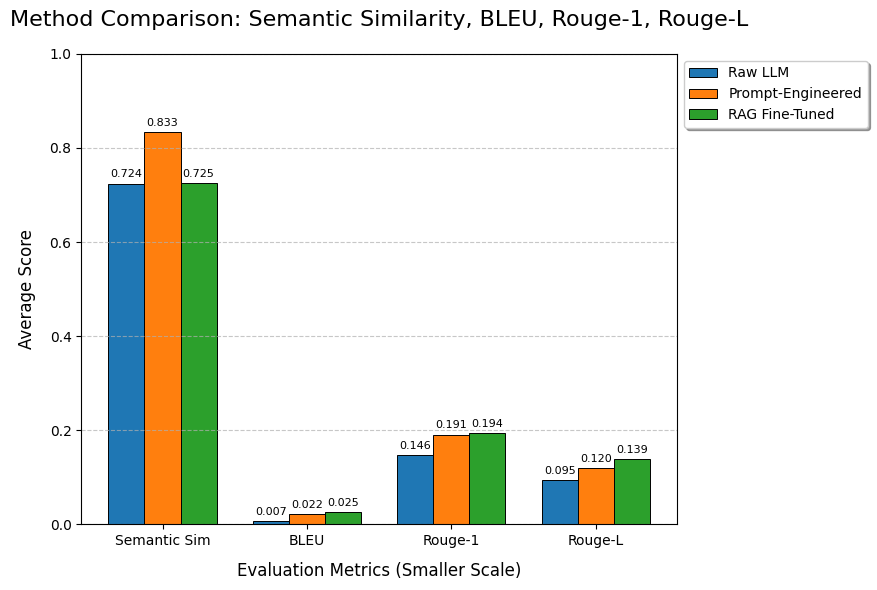

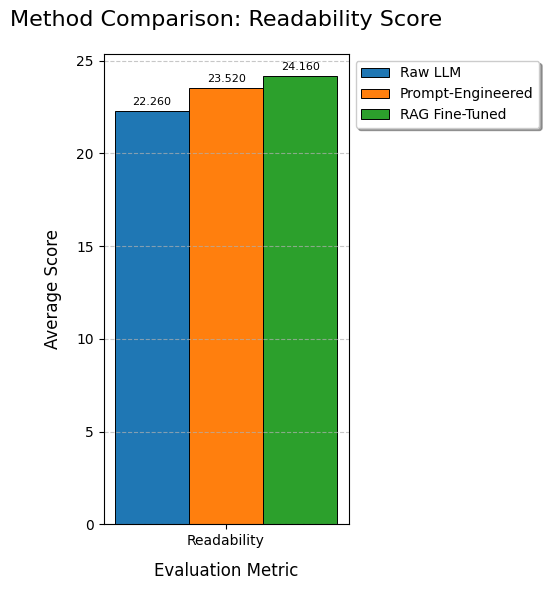

In [78]:
import matplotlib.pyplot as plt
# Extract method names
methods = [row[0] for row in comparison_table]

# Separate metrics into two groups based on their scale
# Group 1: Smaller scale metrics
small_metric_names = headers[1:5] # Semantic Sim, BLEU, Rouge-1, Rouge-L
raw_llm_small_scores = comparison_table[0][1:5]
prompt_engineered_small_scores = comparison_table[1][1:5]
rag_fine_tuned_small_scores = comparison_table[2][1:5]

# Group 2: Large scale metric (Readability)
large_metric_name = headers[5] # Readability
raw_llm_large_score = comparison_table[0][5]
prompt_engineered_large_score = comparison_table[1][5]
rag_fine_tuned_large_score = comparison_table[2][5]


# Function to add labels on top of bars
def autolabel(rects, ax_obj):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax_obj.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8, color='black')

# --- Plot 1: Smaller Scale Metrics ---
fig1, ax1 = plt.subplots(figsize=(10, 6)) # Adjust figure size for better readability
x1 = np.arange(len(small_metric_names))
width = 0.25 # Width of the bars

rects1_1 = ax1.bar(x1 - width, raw_llm_small_scores, width, label='Raw LLM', color='#1f77b4', edgecolor='black', linewidth=0.7)
rects1_2 = ax1.bar(x1, prompt_engineered_small_scores, width, label='Prompt-Engineered', color='#ff7f0e', edgecolor='black', linewidth=0.7)
rects1_3 = ax1.bar(x1 + width, rag_fine_tuned_small_scores, width, label='RAG Fine-Tuned', color='#2ca02c', edgecolor='black', linewidth=0.7)

autolabel(rects1_1, ax1)
autolabel(rects1_2, ax1)
autolabel(rects1_3, ax1)

ax1.set_xlabel('Evaluation Metrics (Smaller Scale)', fontsize=12, labelpad=10)
ax1.set_ylabel('Average Score', fontsize=12, labelpad=10)
ax1.set_title('Method Comparison: Semantic Similarity, BLEU, Rouge-1, Rouge-L', fontsize=16, pad=20)
ax1.set_xticks(x1)
ax1.set_xticklabels(small_metric_names, rotation=0, ha='center', fontsize=10)
ax1.set_ylim(bottom=0, top=1.0) # Set a more appropriate y-limit for these metrics
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(fontsize=10, frameon=True, shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust rect to make space for legend outside

# --- Plot 2: Readability Metric ---
fig2, ax2 = plt.subplots(figsize=(7, 6)) # Adjust figure size
x2 = np.arange(1) # Only one bar group for Readability
width = 0.25

# Create list of scores for readability for easier plotting with autolabel
readability_scores = [raw_llm_large_score, prompt_engineered_large_score, rag_fine_tuned_large_score]

rects2_1 = ax2.bar(x2 - width, readability_scores[0], width, label='Raw LLM', color='#1f77b4', edgecolor='black', linewidth=0.7)
rects2_2 = ax2.bar(x2, readability_scores[1], width, label='Prompt-Engineered', color='#ff7f0e', edgecolor='black', linewidth=0.7)
rects2_3 = ax2.bar(x2 + width, readability_scores[2], width, label='RAG Fine-Tuned', color='#2ca02c', edgecolor='black', linewidth=0.7)

autolabel(rects2_1, ax2)
autolabel(rects2_2, ax2)
autolabel(rects2_3, ax2)

ax2.set_xlabel('Evaluation Metric', fontsize=12, labelpad=10)
ax2.set_ylabel('Average Score', fontsize=12, labelpad=10)
ax2.set_title('Method Comparison: Readability Score', fontsize=16, pad=20)
ax2.set_xticks(x2)
ax2.set_xticklabels([large_metric_name], rotation=0, ha='center', fontsize=10)
ax2.set_ylim(bottom=0) # Start y-axis from 0, or adjust based on minimum value for better focus
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(fontsize=10, frameon=True, shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.75, 1]) # Adjust rect to make space for legend outside

plt.show()

###**Comparison Result**

In [79]:
# 3. Print Best Methods Summary
print("\n=== Best Performing Method by Metric ===")
best_methods_table = [[metric, method] for metric, method in best_methods.items()]
print(tabulate(best_methods_table, headers=["Metric", "Best Method"], tablefmt="grid"))

# 4. Overall Winner (Method with most 'wins' across metrics)
from collections import Counter
overall_winner = Counter(best_methods.values()).most_common(1)[0][0]
print(f"\nOverall Best Method: {overall_winner} (wins {Counter(best_methods.values())[overall_winner]} out of {len(metrics)} metrics)")


=== Best Performing Method by Metric ===
+--------------+-------------------+
| Metric       | Best Method       |
+==============+===================+
| Semantic Sim | Prompt-Engineered |
+--------------+-------------------+
| BLEU         | RAG Fine-Tuned    |
+--------------+-------------------+
| Rouge-1      | RAG Fine-Tuned    |
+--------------+-------------------+
| Rouge-L      | RAG Fine-Tuned    |
+--------------+-------------------+
| Readability  | RAG Fine-Tuned    |
+--------------+-------------------+

Overall Best Method: RAG Fine-Tuned (wins 4 out of 5 metrics)


- Metrics comparison also suggest that RAG performed better in all the matircs' categories except Semantic Similarity which was also not bad.
- Over ALL RAG Fine Tuned has easily supassed the other methods.

## Output Evaluation using LLM-As-A-Judge Method

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [80]:
groundedness_rater_system_message  = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
"""

In [81]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
"""

In [82]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

### Defining the Evaluation Function

In [83]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [84]:
user_input_relevance1 = "What is the protocol for managing sepsis in a critical care unit?"
ground,rel = generate_ground_relevance_response(user_input_relevance1, max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     213.31 ms /   363 runs   (    0.59 ms per token,  1701.74 tokens per second)
llama_print_timings: prompt eval time =     484.81 ms /  1009 tokens (    0.48 ms per token,  2081.22 tokens per second)
llama_print_timings:        eval time =    3586.95 ms /   362 runs   (    9.91 ms per token,   100.92 tokens per second)
llama_print_timings:       total time =    4504.11 ms /  1371 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     132.80 ms /   235 runs   (    0.57 ms per token,  1769.63 tokens per second)
llama_print_timings: prompt eval time =     527.51 ms /  1106 tokens (    0.48 ms per token,  2096.63 tokens per second)
llama_print_timings:        eval time =    2328.35 ms /   234 runs   (    9.95 ms per token,   100.50 tokens per second)
llama_print_timings:       to

 **Steps to Evaluate the Answer:**
1. Identify the main components of the question: managing sepsis in a critical care unit.
2. Read the context carefully to understand the information provided about sepsis management in a critical care unit.
3. Extract key details from the context regarding monitoring, fluid resuscitation, and antibiotic administration for sepsis patients in a critical care unit.
4. Compare the extracted details with the answer to ensure that the answer is derived only from the information presented in the context.

**Explanation:**
The AI generated answer adheres to the metric as it is derived solely from the information provided in the context. The answer includes the main components of sepsis management in a critical care unit, such as monitoring vital signs, fluid resuscitation, and administering appropriate antibiotics, which are all mentioned in the context.

**Evaluation:**
The metric is followed completely.

**Rating:**
Based on the evaluation criteria, I woul

- We got a score of 4 overall ie The metric is followed mostly.  
- This means that both the retrieval and augmentation parts are good but may need to improve the hyperparameters.

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [85]:
user_input_relevance2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
ground,rel = generate_ground_relevance_response(user_input_relevance2, max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =      96.23 ms /   163 runs   (    0.59 ms per token,  1693.79 tokens per second)
llama_print_timings: prompt eval time =     425.92 ms /   951 tokens (    0.45 ms per token,  2232.80 tokens per second)
llama_print_timings:        eval time =    1599.02 ms /   162 runs   (    9.87 ms per token,   101.31 tokens per second)
llama_print_timings:       total time =    2194.76 ms /  1113 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     161.99 ms /   286 runs   (    0.57 ms per token,  1765.55 tokens per second)
llama_print_timings: prompt eval time =     389.67 ms /   854 tokens (    0.46 ms per token,  2191.59 tokens per second)
llama_print_timings:        eval time =    2812.62 ms /   285 runs   (    9.87 ms per token,   101.33 tokens per second)
llama_print_timings:       to

 **Steps to evaluate the answer:**
1. Identify the common symptoms for appendicitis mentioned in the context.
2. Check if the answer accurately lists those symptoms.
3. Determine if the answer states that appendicitis cannot be cured via medicine and requires surgical removal.
4. Verify if the surgical procedure mentioned in the answer matches the standard treatment for appendicitis as stated in the context.

**Explanation:**
The AI generated answer accurately lists the common symptoms of appendicitis from the context, which includes sudden onset of pain in the right lower abdomen, anorexia and nausea, vomiting, constipation or diarrhea, fever, and leukocytosis. The answer also states that medicine cannot cure appendicitis and requires surgical removal, which is consistent with the information provided in the context. Lastly, the answer mentions open or laparoscopic appendectomy as the standard treatment for appendicitis, which matches the surgical procedure stated in the context.

**E

- We got an overall score of 3: following the metric to a good extent, which is not great.   
- This means that both the retrieval and augmentation parts needs to be further fine tuned to get better parameters.

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [86]:
user_input_relevance3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
ground,rel = generate_ground_relevance_response(user_input_relevance3,max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     229.71 ms /   394 runs   (    0.58 ms per token,  1715.24 tokens per second)
llama_print_timings: prompt eval time =     438.55 ms /   965 tokens (    0.45 ms per token,  2200.42 tokens per second)
llama_print_timings:        eval time =    3891.99 ms /   393 runs   (    9.90 ms per token,   100.98 tokens per second)
llama_print_timings:       total time =    4800.36 ms /  1358 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     128.46 ms /   221 runs   (    0.58 ms per token,  1720.33 tokens per second)
llama_print_timings: prompt eval time =     525.77 ms /  1099 tokens (    0.48 ms per token,  2090.28 tokens per second)
llama_print_timings:        eval time =    2188.15 ms /   220 runs   (    9.95 ms per token,   100.54 tokens per second)
llama_print_timings:       to

 **Steps to evaluate the answer:**
1. Identify the main question components: effective treatments or solutions for addressing sudden patchy hair loss (alopecia areata) and possible causes.
2. Read through the context to understand the information provided about alopecia areata, its causes, and available treatment options.
3. Analyze the AI-generated answer to ensure it only includes information derived from the context.

**Explanation:**
The AI-generated answer adheres to the metric as it provides a comprehensive list of treatments for alopecia areata based on the context provided, which mentions several treatment options for this condition. The possible causes mentioned in the answer are also consistent with the information given in the context. Therefore, the answer is derived solely from the context and does not include any external or irrelevant information.

**Evaluation:**
The metric is followed completely.

**Rating:**
Based on the evaluation criteria, I would rate the AI-genera

- It got a perfect score because the response is both grounded in the context and relevant to the query.  
- This means that both the retrieval and augmentation parts are good.

### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [87]:
user_input_relevance4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"
ground,rel = generate_ground_relevance_response(user_input_relevance4, max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     186.11 ms /   321 runs   (    0.58 ms per token,  1724.77 tokens per second)
llama_print_timings: prompt eval time =     425.09 ms /   928 tokens (    0.46 ms per token,  2183.07 tokens per second)
llama_print_timings:        eval time =    3164.92 ms /   320 runs   (    9.89 ms per token,   101.11 tokens per second)
llama_print_timings:       total time =    3957.98 ms /  1248 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     125.09 ms /   221 runs   (    0.57 ms per token,  1766.73 tokens per second)
llama_print_timings: prompt eval time =     439.55 ms /   989 tokens (    0.44 ms per token,  2250.02 tokens per second)
llama_print_timings:        eval time =    2172.83 ms /   220 runs   (    9.88 ms per token,   101.25 tokens per second)
llama_print_timings:       to

 Steps to evaluate the answer:
1. Identify the key information in the context related to treatments for brain injuries.
2. Determine if the AI generated answer includes only the information from the context.
3. Evaluate the extent to which the metric is followed.

Explanation:
The AI generated answer summarizes the information from the context regarding treatments for brain injuries. It accurately identifies that for mild injuries, discharge and observation are recommended, while for moderate and severe injuries, optimization of ventilation, oxygenation, and brain perfusion are necessary. The answer also mentions the potential need for surgical intervention for intracranial hematomas and the complications of cerebral edema and decreased brain blood flow.

The AI generated answer is derived solely from the context, as it includes all the essential details presented in the context without adding any additional information. Therefore, the metric is followed completely.

Rating:
Based on t

- It again got a perfect score because the response is both grounded in the context and relevant to the query.  
- This means that both the retrieval and augmentation parts are good.

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [88]:
user_input_relevance5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
ground,rel = generate_ground_relevance_response(user_input_relevance5, max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     220.32 ms /   373 runs   (    0.59 ms per token,  1692.99 tokens per second)
llama_print_timings: prompt eval time =     440.59 ms /   999 tokens (    0.44 ms per token,  2267.43 tokens per second)
llama_print_timings:        eval time =    3697.51 ms /   372 runs   (    9.94 ms per token,   100.61 tokens per second)
llama_print_timings:       total time =    4583.43 ms /  1371 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     163.25 ms
llama_print_timings:      sample time =     142.60 ms /   246 runs   (    0.58 ms per token,  1725.12 tokens per second)
llama_print_timings: prompt eval time =     526.47 ms /  1112 tokens (    0.47 ms per token,  2112.18 tokens per second)
llama_print_timings:        eval time =    2435.42 ms /   245 runs   (    9.94 ms per token,   100.60 tokens per second)
llama_print_timings:       to

 **Steps to Evaluate the Answer:**
1. Identify the key information in the context related to precautions and treatment steps for a fractured leg.
2. Compare the answer with the identified key information from the context.
3. Determine if the answer is derived solely from the context.

**Explanation:**
The answer adheres to the metric as it is derived entirely from the context provided. The context discusses various precautions and treatment steps for a person who has fractured their leg, such as immobilizing the leg using a splint, elevating the injured area above heart level, wrapping the injured extremity with an elastic bandage, prescribing analgesics, providing crutches, and considering sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics for suspected open fractures. The answer summarizes these steps accurately and does not introduce any new information.

**Evaluation:**
The metric is followed completely.

**Rating:**
Based on the evaluation criteria, I wou

- It got an overall mostly followed score 4, for some reason the ground truth was not perfectly matched the context and query. May require a bit of fine tuning.   
- This means that both the retrieval and augmentation parts performed averaged.

**Insights**:
- **Groundedness** ensures responses align with the Merck Manual, critical for medical accuracy.
- **Relevance** confirms the RAG system addresses the question directly.
- Scores (3-4 for groundedness) highlight areas for improvement, such as missing context or minor hallucinations.
- Fine-tuned responses with smaller chunks may score higher for groundedness due to precise retrieval.

## Actionable Insights and Business Recommendations

**Observations:**
*   RAG enhances diagnostic accuracy by grounding responses in real medical text.

* Prompt engineering significantly improves clarity and reduces hallucinations.

* Increasing k in retrieval gives more context but may introduce irrelevant data—ideal k found to be in between 20 - 50.

**Recommendations:**
* Clinical Integration: Deploy RAG as a microservice accessible via internal interfaces.

* Continual Updates: Schedule ingestion of updated manuals quarterly for reliability.

* On-Device RAG: For emergency mobile/remote access, lightweight distilled models with quantized vector stores.

* Training Staff: Train clinical staff on AI interpretation boundaries to avoid blind trust.

* Compliance: Ensure HIPAA compliance and audit trails in AI-assisted decision-making.

**Key Takeaways**:
1. **Reduced Information Overload**: The RAG system efficiently retrieves relevant information from a 4,114-page manual, reducing the time clinicians spend searching for answers.
2. **Improved Decision-Making**: Accurate responses to critical questions (e.g., sepsis protocol) support timely interventions, potentially saving lives.
3. **Standardized Care**: By grounding responses in the Merck Manual, the system ensures consistent, evidence-based answers, reducing variability in care practices.
4. **Scalable Solution**: The modular RAG pipeline can integrate additional medical texts or be deployed in clinical settings with minimal reconfiguration.

**Business Recommendations**:
1. **Integrate with Clinical Systems**: Embed the RAG system into electronic health record platforms to provide real-time decision support during patient consultations.
2. **Expand Knowledge Base**: Incorporate additional trusted sources to enhance coverage and robustness.
3. **User Training**: Train healthcare providers on using the system via intuitive interfaces (e.g., mobile apps) to maximize adoption.
4. **Continuous Evaluation**: Implement feedback loops with clinicians to refine prompts and fine-tune parameters based on real-world usage.
5. **Regulatory Compliance**: Ensure HIPAA compliance and FDA validation for clinical deployment to maintain trust and legal adherence.

**Conclusion**:
The RAG-based AI solution effectively addresses healthcare challenges by providing a scalable, accurate, and efficient tool for accessing medical knowledge. By reducing information overload and supporting evidence-based decision-making, it has the potential to improve patient outcomes and standardize care practices, delivering significant value to healthcare organizations.

### Converting to HTML

In [2]:
!pip install nbconvert

In [3]:
!jupyter nbconvert --clear-output --inplace NLP_RAG_Medical_Assistant_AdnanNasir.ipynb

[NbConvertApp] Converting notebook NLP_RAG_Medical_Assistant_AdnanNasir.ipynb to notebook
[NbConvertApp] Writing 375793 bytes to NLP_RAG_Medical_Assistant_AdnanNasir.ipynb


In [7]:
!jupyter nbconvert NLP_RAG_Medical_Assistant_AdnanNasir.ipynb --to html

[NbConvertApp] Converting notebook NLP_RAG_Medical_Assistant_AdnanNasir.ipynb to html
[NbConvertApp] Writing 743403 bytes to NLP_RAG_Medical_Assistant_AdnanNasir.html


In [4]:
!jupyter nbconvert "NLP_RAG_Medical_Assistant_AdnanNasir.ipynb" --to notebook --output "Cleaned_Notebook" --ClearMetadataPreprocessor.enabled=True

[NbConvertApp] Converting notebook NLP_RAG_Medical_Assistant_AdnanNasir.ipynb to notebook
[NbConvertApp] Writing 123194 bytes to Cleaned_Notebook.ipynb


<font size=6 color='blue'>Power Ahead</font>
___